SEABORN

## 1. Configuracion Basica e Importaciones

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configurar estilo general
sns.set_theme()                          # tema por defecto
sns.set_style('darkgrid')                # darkgrid, whitegrid, dark, white, ticks
sns.set_context('notebook')              # paper, notebook, talk, poster
sns.set_palette('deep')                  # deep, muted, bright, pastel, dark, colorblind

# Configurar tamaño de figura por defecto
plt.rcParams['figure.figsize'] = (10, 6)

# Resetear configuracion
sns.reset_orig()                         # volver a configuracion original

## 2. Datasets de Ejemplo (UTIL PARA EXAMENES)

In [2]:
# Cargar datasets incorporados en seaborn
tips = sns.load_dataset('tips')          # propinas en restaurante
iris = sns.load_dataset('iris')          # flores iris
titanic = sns.load_dataset('titanic')    # pasajeros del titanic
flights = sns.load_dataset('flights')    # vuelos por mes/año
diamonds = sns.load_dataset('diamonds')  # diamantes
penguins = sns.load_dataset('penguins')  # pinguinos

# Ver datasets disponibles
sns.get_dataset_names()

# Explorar datos rapido
tips.head()
tips.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

## 3. Graficos de Distribucion - Variables Numericas

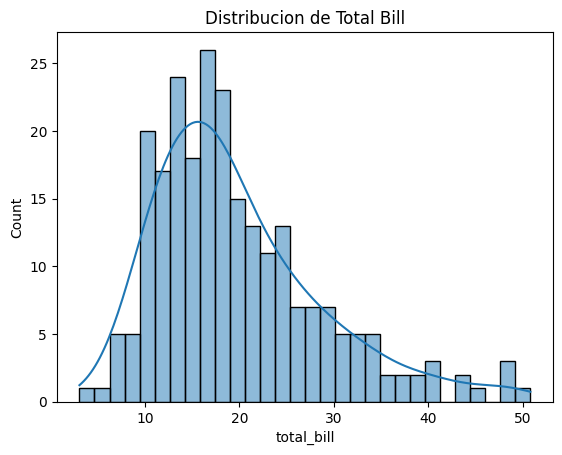

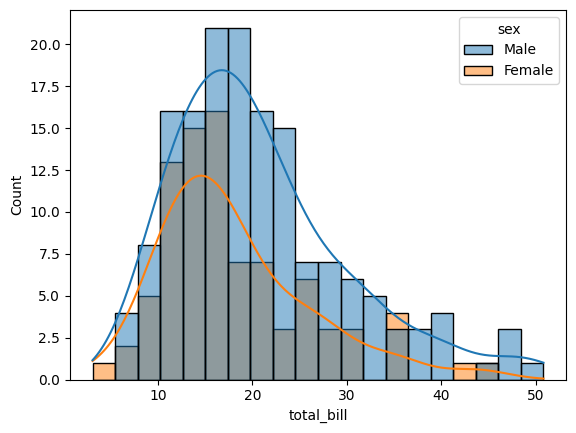

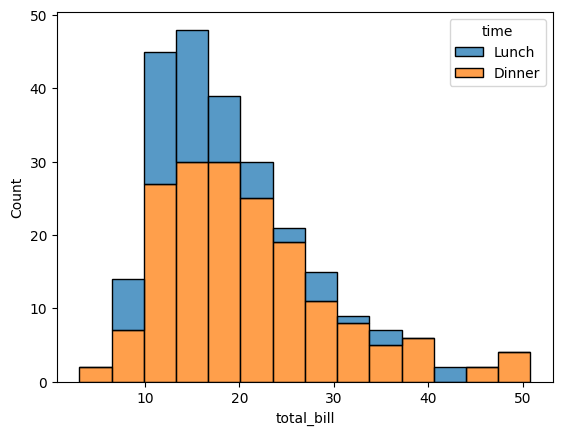

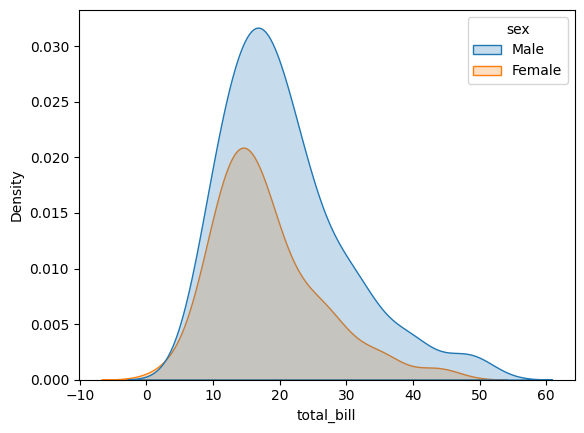

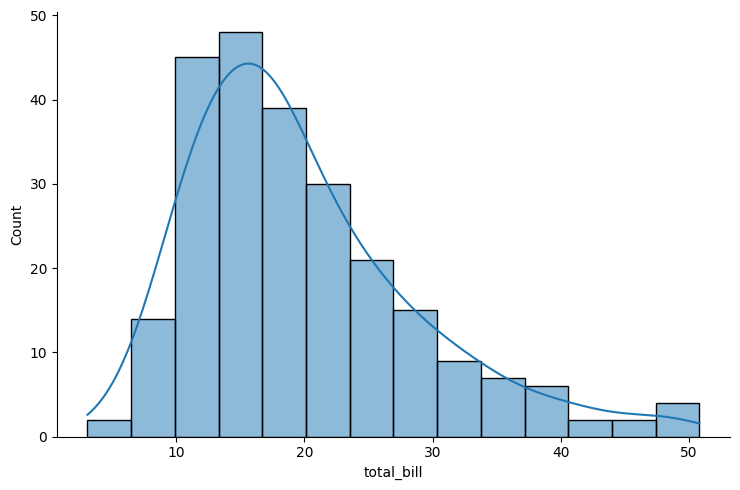

In [3]:
# Histograma con KDE (TIPICO EN EXAMENES)
sns.histplot(data=tips, x='total_bill', kde=True, bins=30)
plt.title('Distribucion de Total Bill')
plt.show()

# Histograma separado por categoria (hue)
sns.histplot(data=tips, x='total_bill', hue='sex', kde=True, bins=20)
plt.show()

# Histograma apilado
sns.histplot(data=tips, x='total_bill', hue='time', multiple='stack')
plt.show()

# KDE plot (estimacion de densidad)
sns.kdeplot(data=tips, x='total_bill', hue='sex', fill=True)
plt.show()

# Distribucion univariada - histplot vs displot
sns.displot(data=tips, x='total_bill', kde=True, height=5, aspect=1.5)
plt.show()

## 4. Graficos de Distribucion - BoxPlot y ViolinPlot

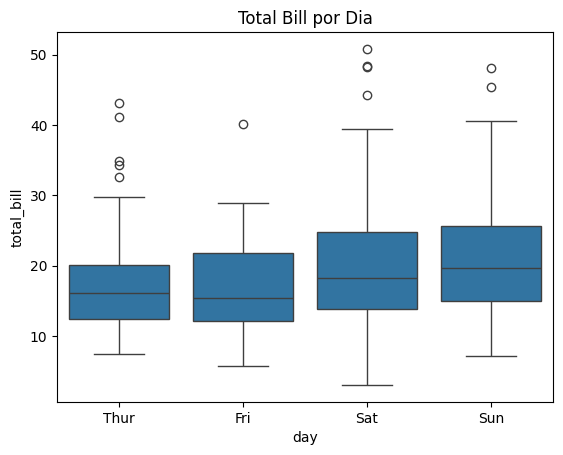

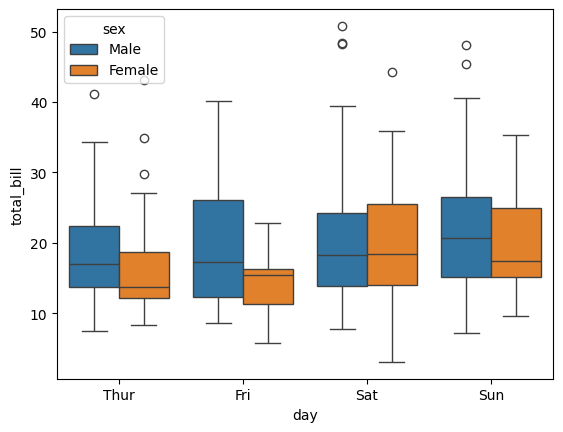

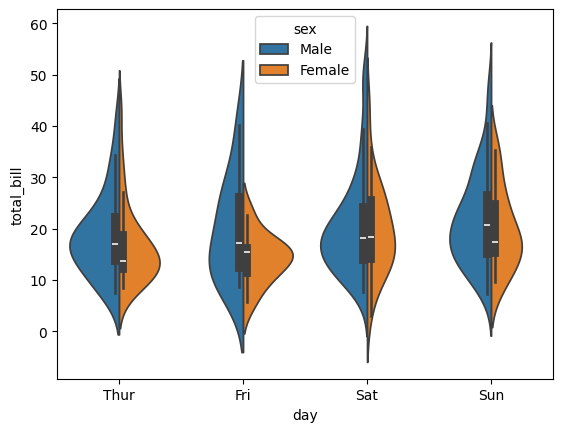

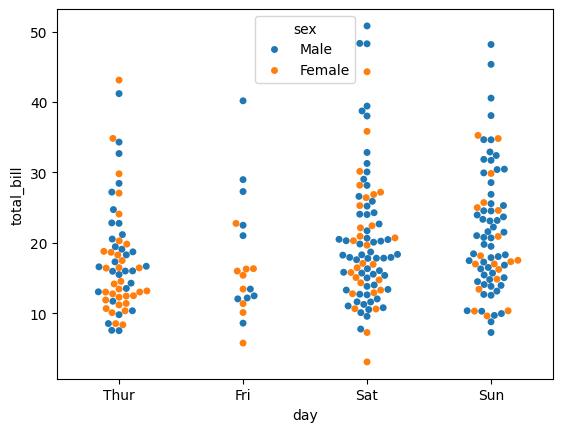

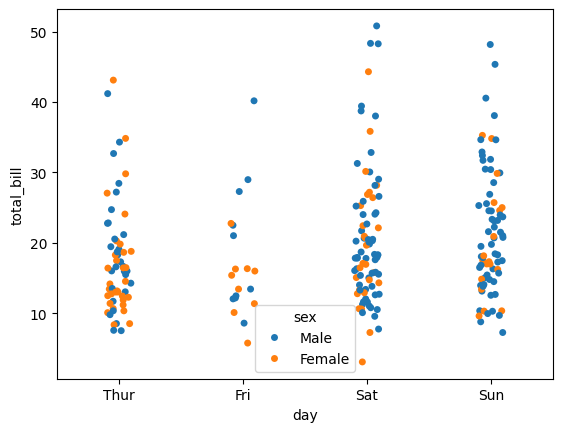

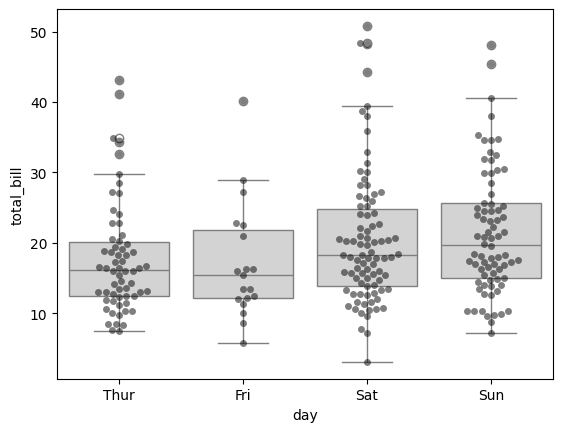

In [4]:
# BoxPlot - Ver distribucion y outliers (CLAVE EXAMENES)
sns.boxplot(data=tips, x='day', y='total_bill')
plt.title('Total Bill por Dia')
plt.show()

# BoxPlot con hue (separar por categoria)
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex')
plt.show()

# ViolinPlot - Combinacion de box y kde
sns.violinplot(data=tips, x='day', y='total_bill', hue='sex', split=True)
plt.show()

# Swarmplot - Todos los puntos individuales
sns.swarmplot(data=tips, x='day', y='total_bill', hue='sex')
plt.show()

# Stripplot - Similar a swarm pero con jitter
sns.stripplot(data=tips, x='day', y='total_bill', hue='sex', jitter=True)
plt.show()

# Combinar boxplot con swarmplot (PATRON EXAMENES)
sns.boxplot(data=tips, x='day', y='total_bill', color='lightgray')
sns.swarmplot(data=tips, x='day', y='total_bill', color='black', alpha=0.5)
plt.show()

## 5. Graficos de Relacion - Scatter y Line

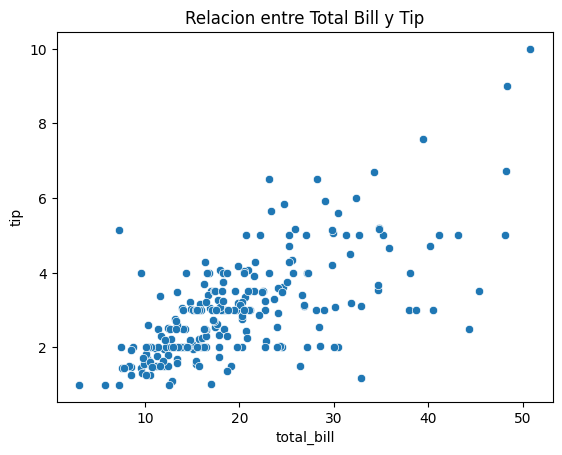

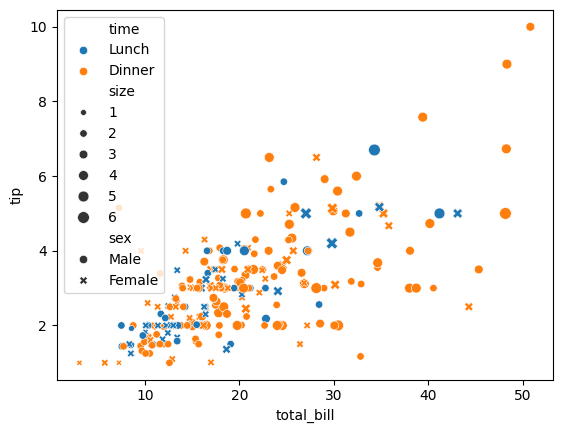

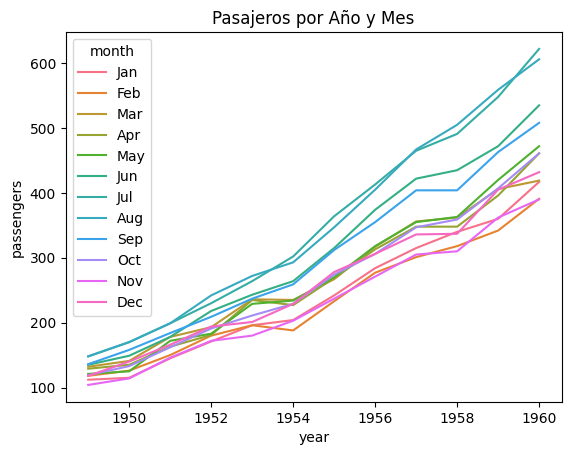

C:\Users\moise\AppData\Local\Temp\ipykernel_15556\3063531157.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=tips, x='size', y='total_bill', ci=95)  # ci=None para quitar


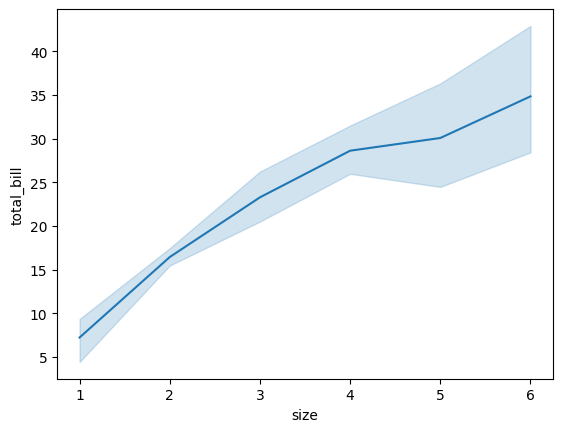

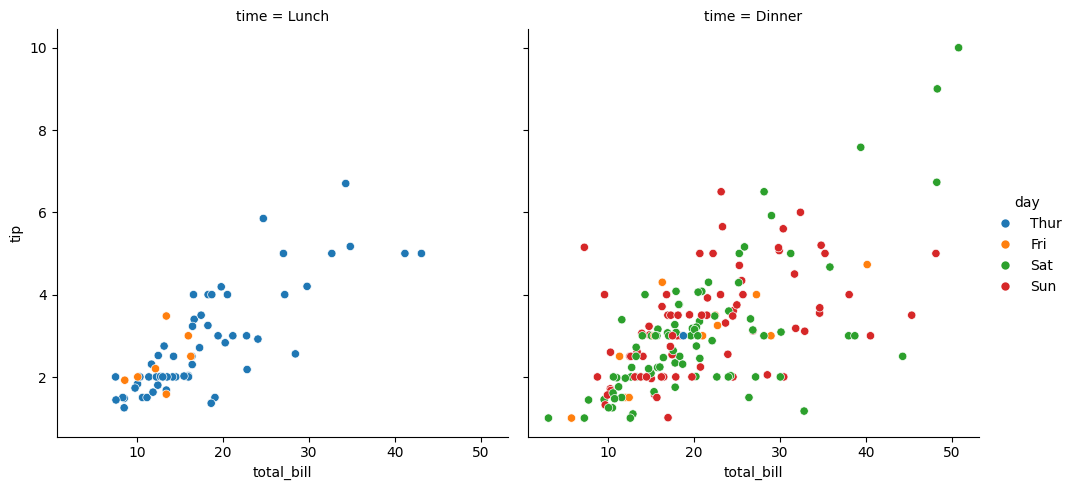

In [5]:
# Scatterplot basico
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.title('Relacion entre Total Bill y Tip')
plt.show()

# Scatterplot con color por categoria (TIPICO EXAMENES)
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', style='sex', size='size')
plt.show()

# Lineplot - Para series temporales
sns.lineplot(data=flights, x='year', y='passengers', hue='month')
plt.title('Pasajeros por Año y Mes')
plt.show()

# Lineplot con intervalo de confianza
sns.lineplot(data=tips, x='size', y='total_bill', ci=95)  # ci=None para quitar
plt.show()

# Relplot - Version de alto nivel para relaciones
sns.relplot(data=tips, x='total_bill', y='tip', hue='day', col='time', kind='scatter')
plt.show()

## 6. Regresion y Correlacion (CLAVE EXAMENES)

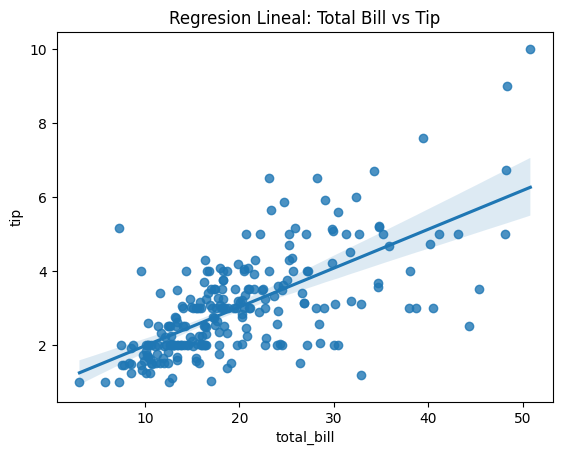

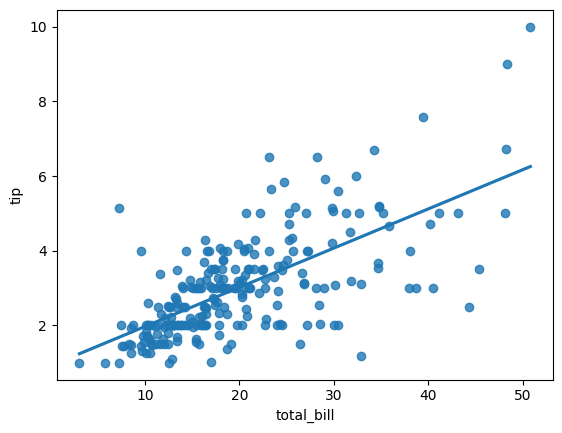

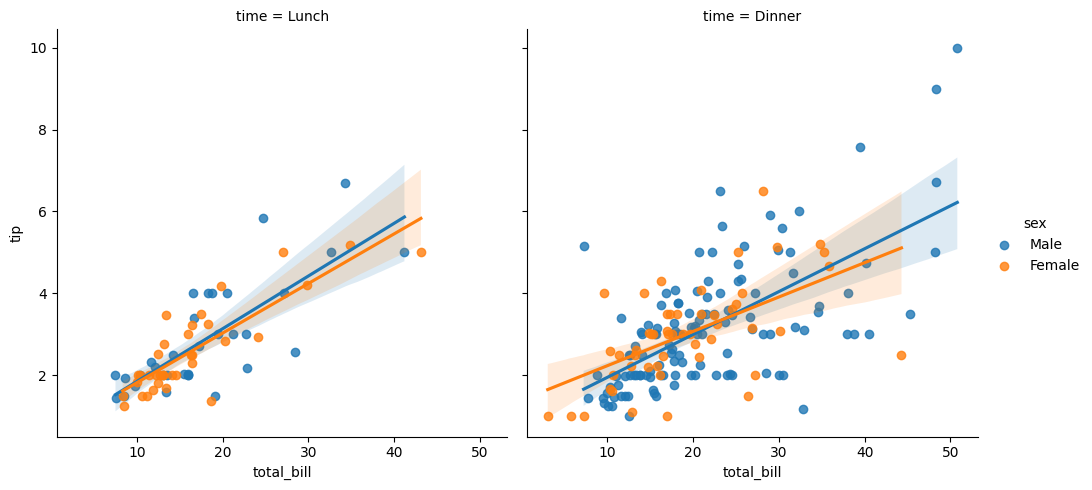

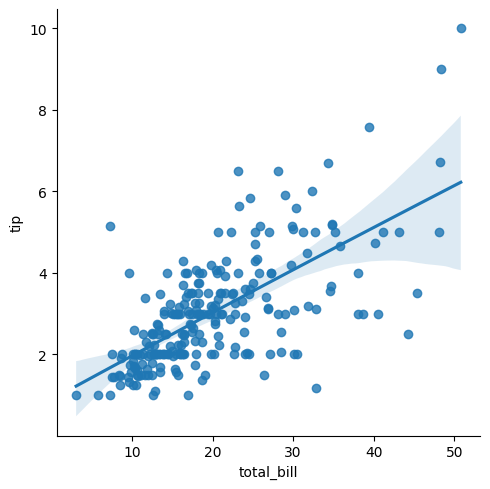

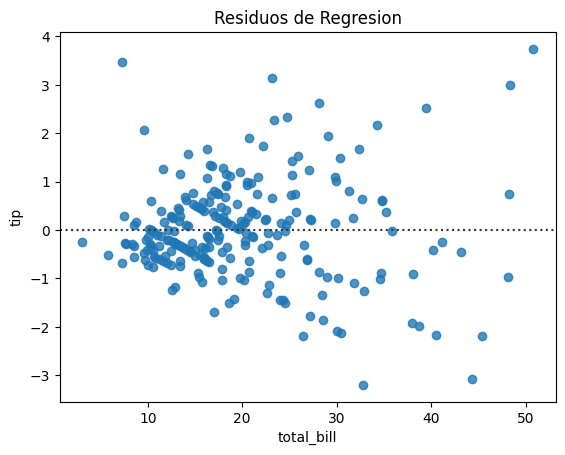

In [6]:
# Regplot - Scatterplot con linea de regresion
sns.regplot(data=tips, x='total_bill', y='tip')
plt.title('Regresion Lineal: Total Bill vs Tip')
plt.show()

# Regplot sin intervalo de confianza
sns.regplot(data=tips, x='total_bill', y='tip', ci=None)
plt.show()

# lmplot - Regplot con facets (PATRON EXAMENES)
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex', col='time')
plt.show()

# lmplot con regresion polinomial
sns.lmplot(data=tips, x='total_bill', y='tip', order=2)  # order=2 para cuadratico
plt.show()

# residplot - Analizar residuos de regresion
sns.residplot(data=tips, x='total_bill', y='tip')
plt.title('Residuos de Regresion')
plt.show()

## 7. Heatmaps - Matrices de Correlacion (TIPICO EXAMENES)

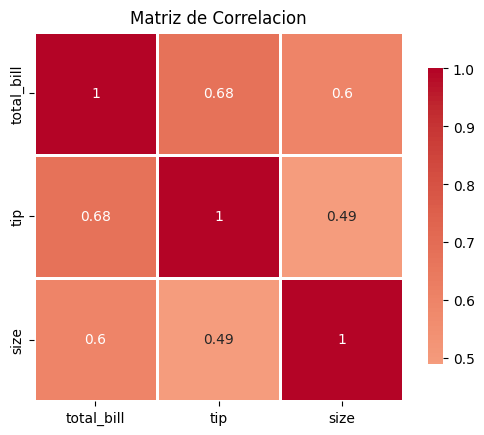

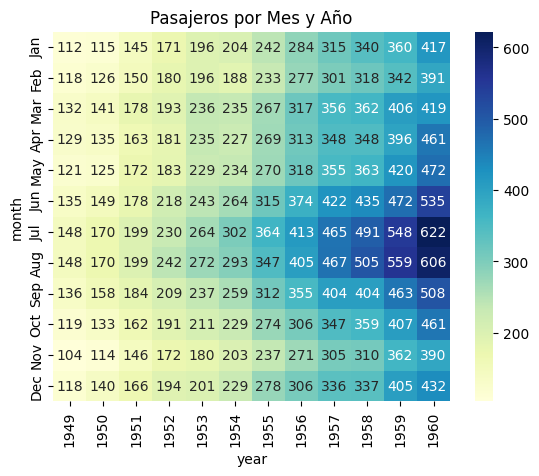

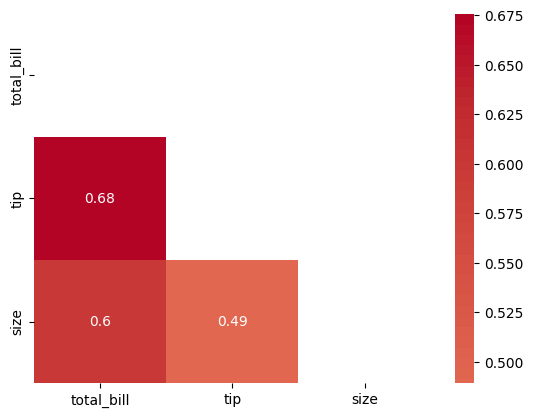

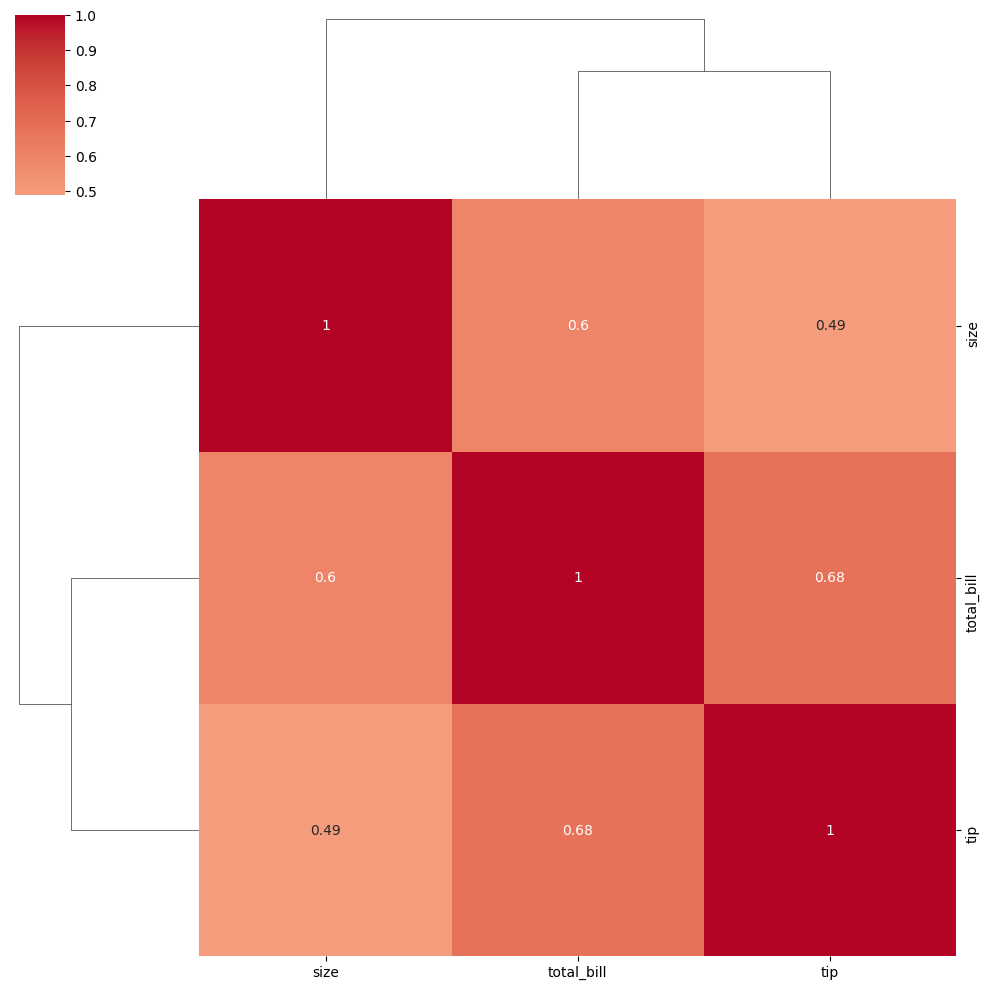

In [7]:
# Matriz de correlacion con heatmap (PATRON CLAVE)
corr_matrix = tips[['total_bill', 'tip', 'size']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlacion')
plt.show()

# Heatmap con datos custom
flights_pivot = flights.pivot(index='month', columns='year', values='passengers')
sns.heatmap(flights_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Pasajeros por Mes y Año')
plt.show()

# Heatmap con mascara triangular (solo mitad de matriz)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0)
plt.show()

# Clustermap - Heatmap con clustering jerarquico
sns.clustermap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

## 8. Graficos Categoricos - Barras y Conteos

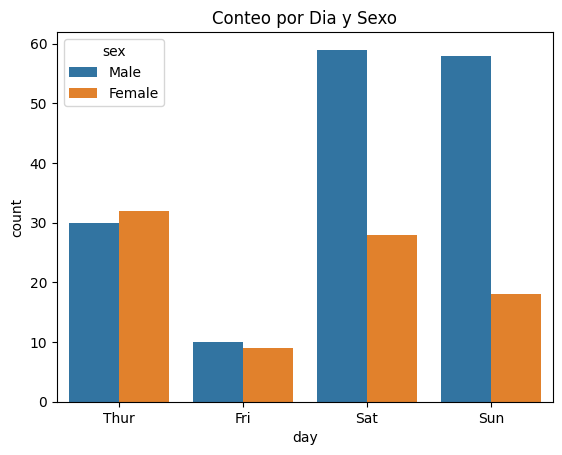

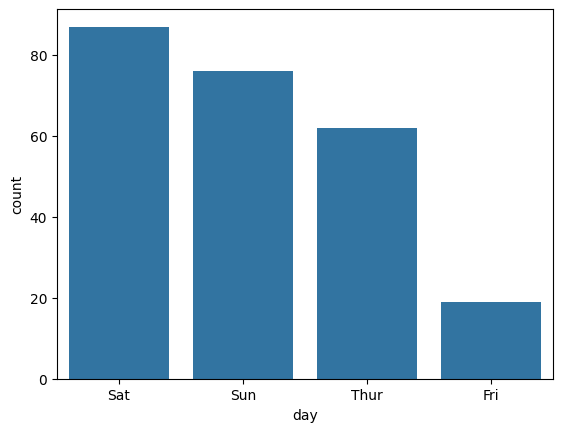

C:\Users\moise\AppData\Local\Temp\ipykernel_15556\394680873.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=tips, x='day', y='total_bill', hue='sex', ci=95)


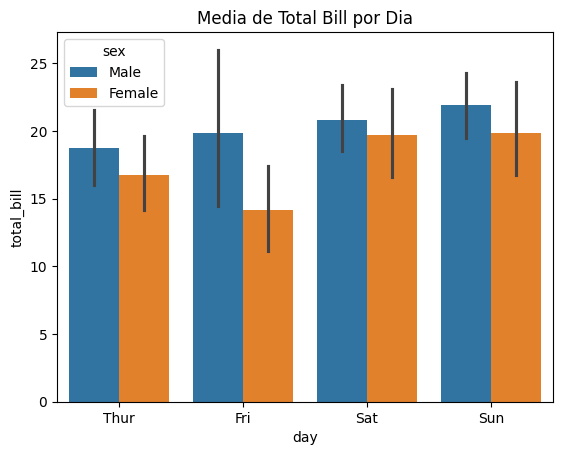

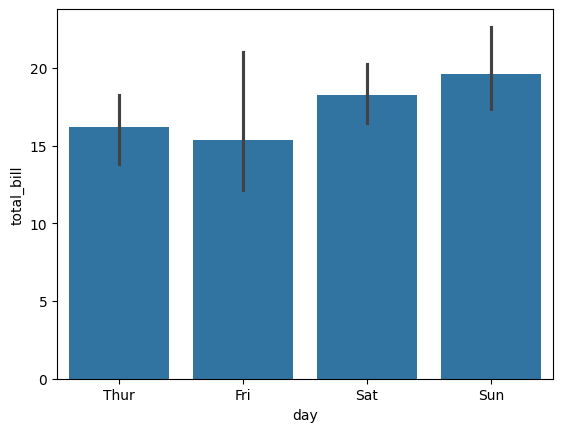

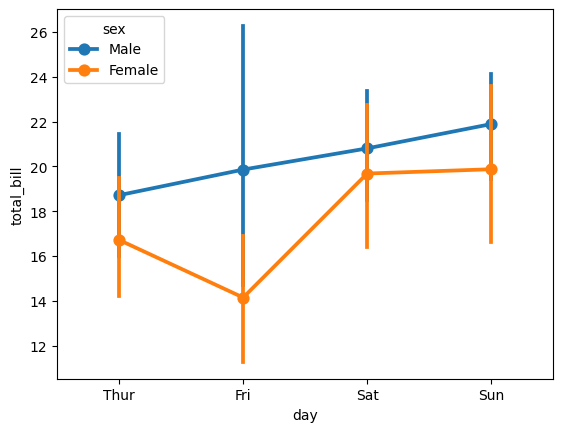

In [8]:
# Countplot - Contar frecuencias (TIPICO EXAMENES)
sns.countplot(data=tips, x='day', hue='sex')
plt.title('Conteo por Dia y Sexo')
plt.show()

# Countplot ordenado por frecuencia
order = tips['day'].value_counts().index
sns.countplot(data=tips, x='day', order=order)
plt.show()

# Barplot - Media con intervalo de confianza
sns.barplot(data=tips, x='day', y='total_bill', hue='sex', ci=95)
plt.title('Media de Total Bill por Dia')
plt.show()

# Barplot con estimador custom (mediana, suma, etc)
sns.barplot(data=tips, x='day', y='total_bill', estimator=np.median)
plt.show()

# Pointplot - Puntos conectados con lineas
sns.pointplot(data=tips, x='day', y='total_bill', hue='sex')
plt.show()

## 9. Catplot - Graficos Categoricos de Alto Nivel

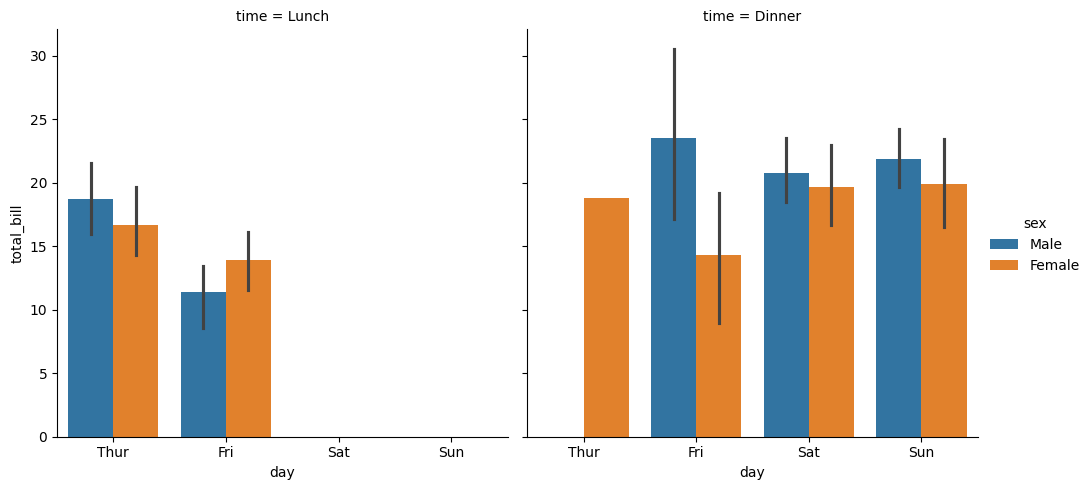

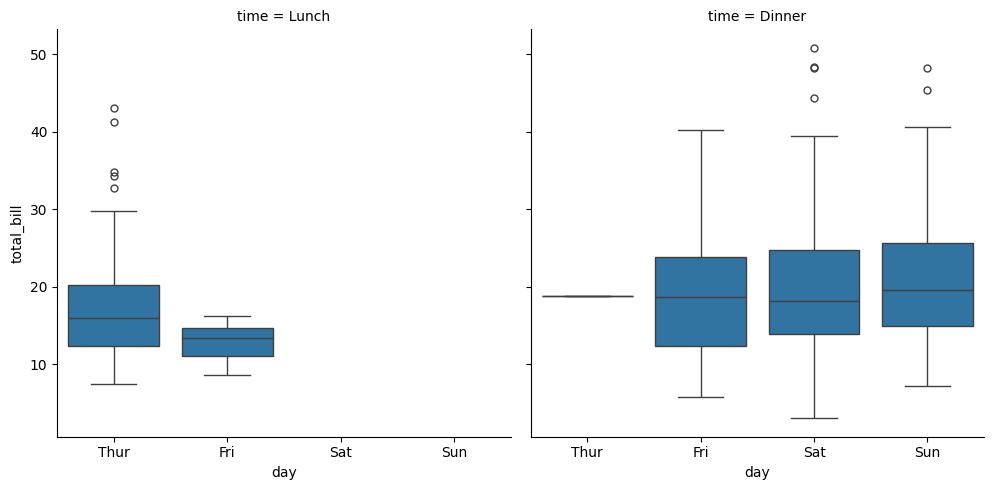

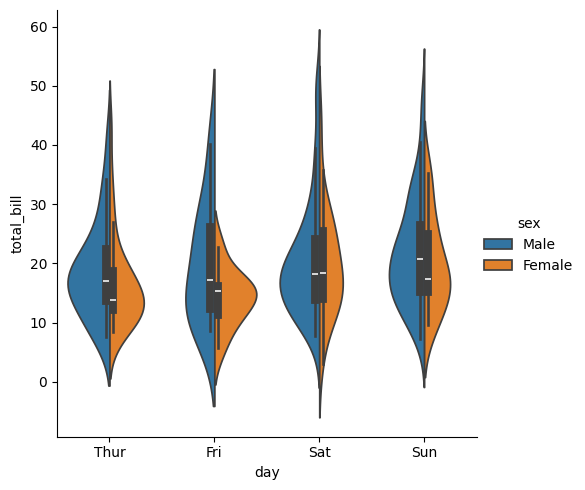

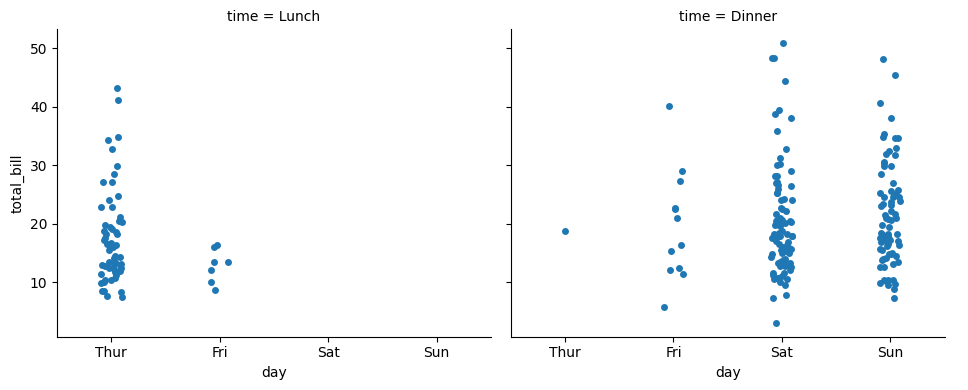

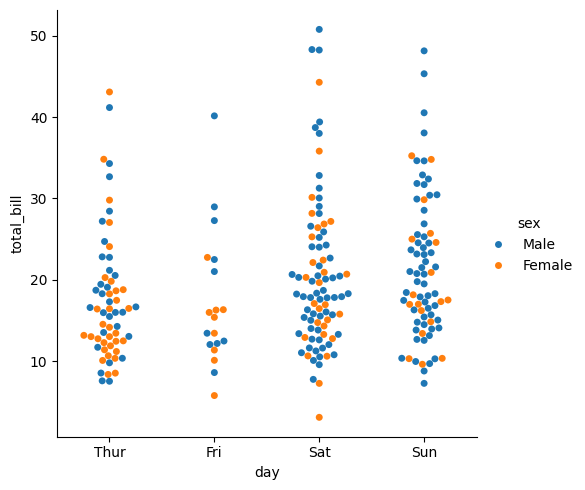

In [9]:
# Catplot con kind='bar' (PATRON EXAMENES)
sns.catplot(data=tips, x='day', y='total_bill', kind='bar', col='time', hue='sex')
plt.show()

# Catplot con kind='box'
sns.catplot(data=tips, x='day', y='total_bill', kind='box', col='time')
plt.show()

# Catplot con kind='violin'
sns.catplot(data=tips, x='day', y='total_bill', kind='violin', hue='sex', split=True)
plt.show()

# Catplot con kind='strip'
sns.catplot(data=tips, x='day', y='total_bill', kind='strip', jitter=True, 
            col='time', height=4, aspect=1.2)
plt.show()

# Catplot con kind='swarm'
sns.catplot(data=tips, x='day', y='total_bill', kind='swarm', hue='sex')
plt.show()

## 10. PairPlot - Matriz de Graficos (CLAVE EXAMENES)

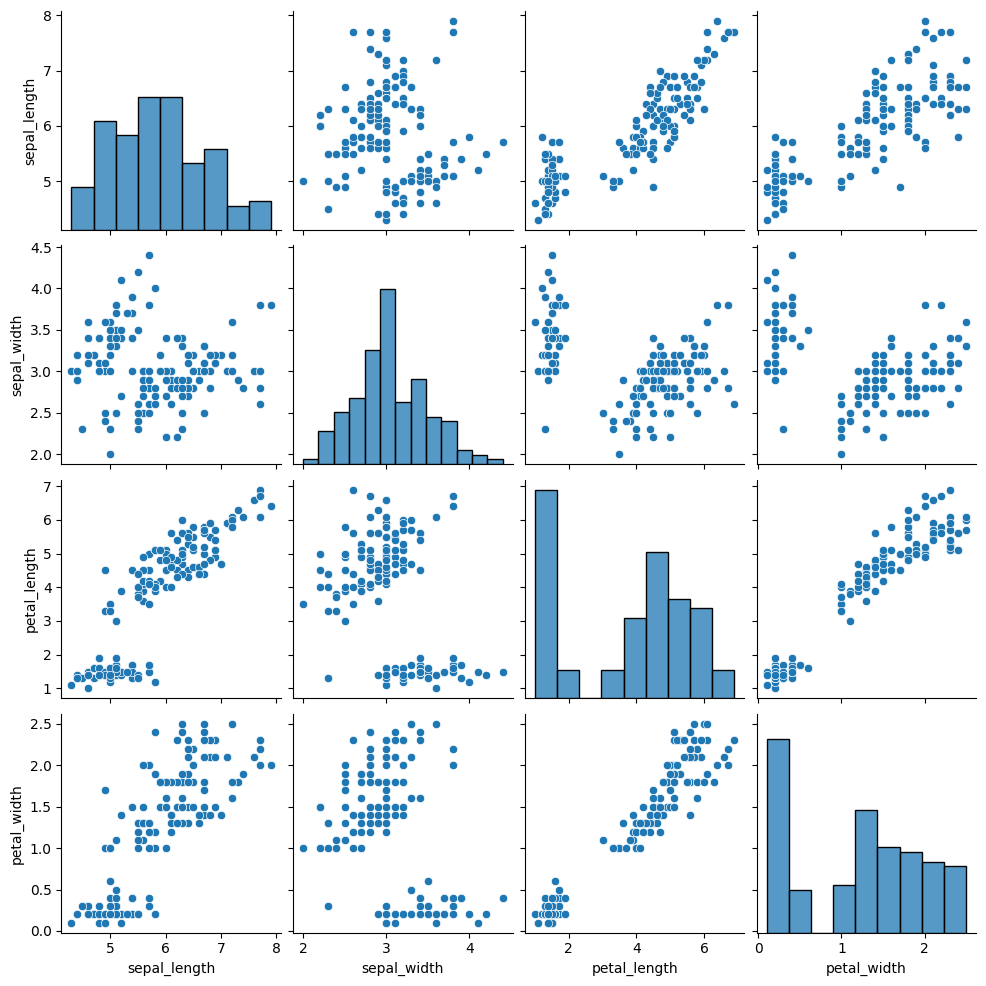

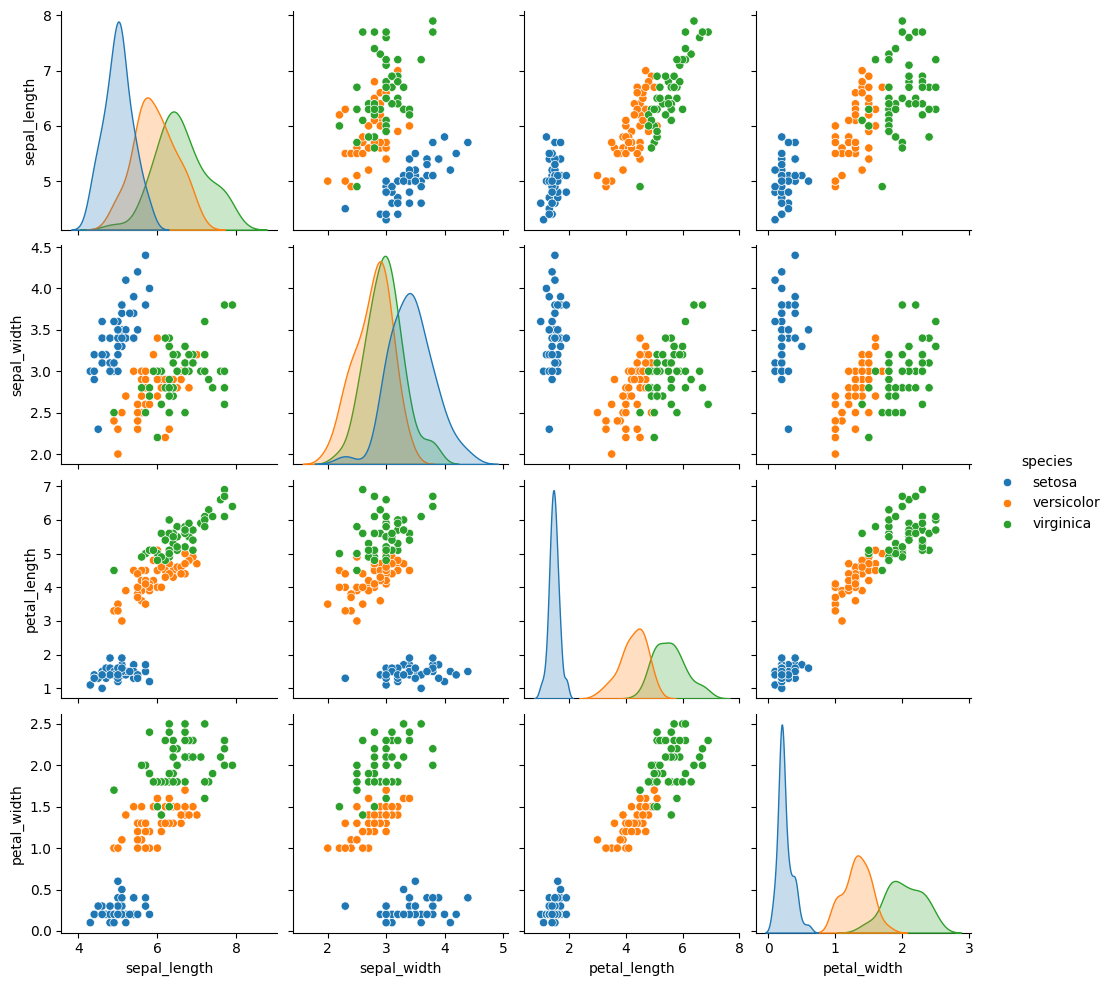

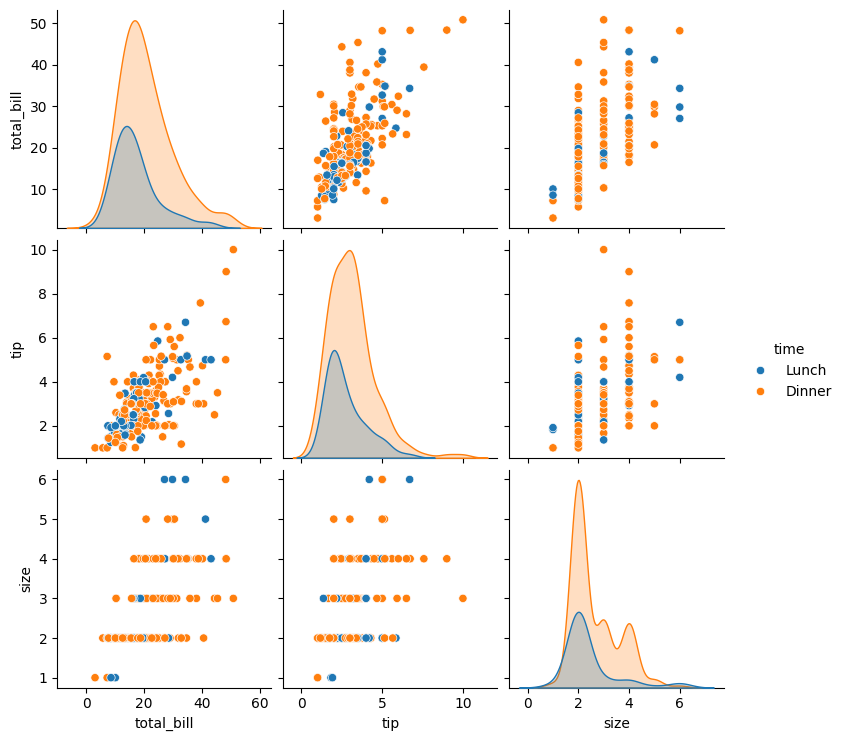

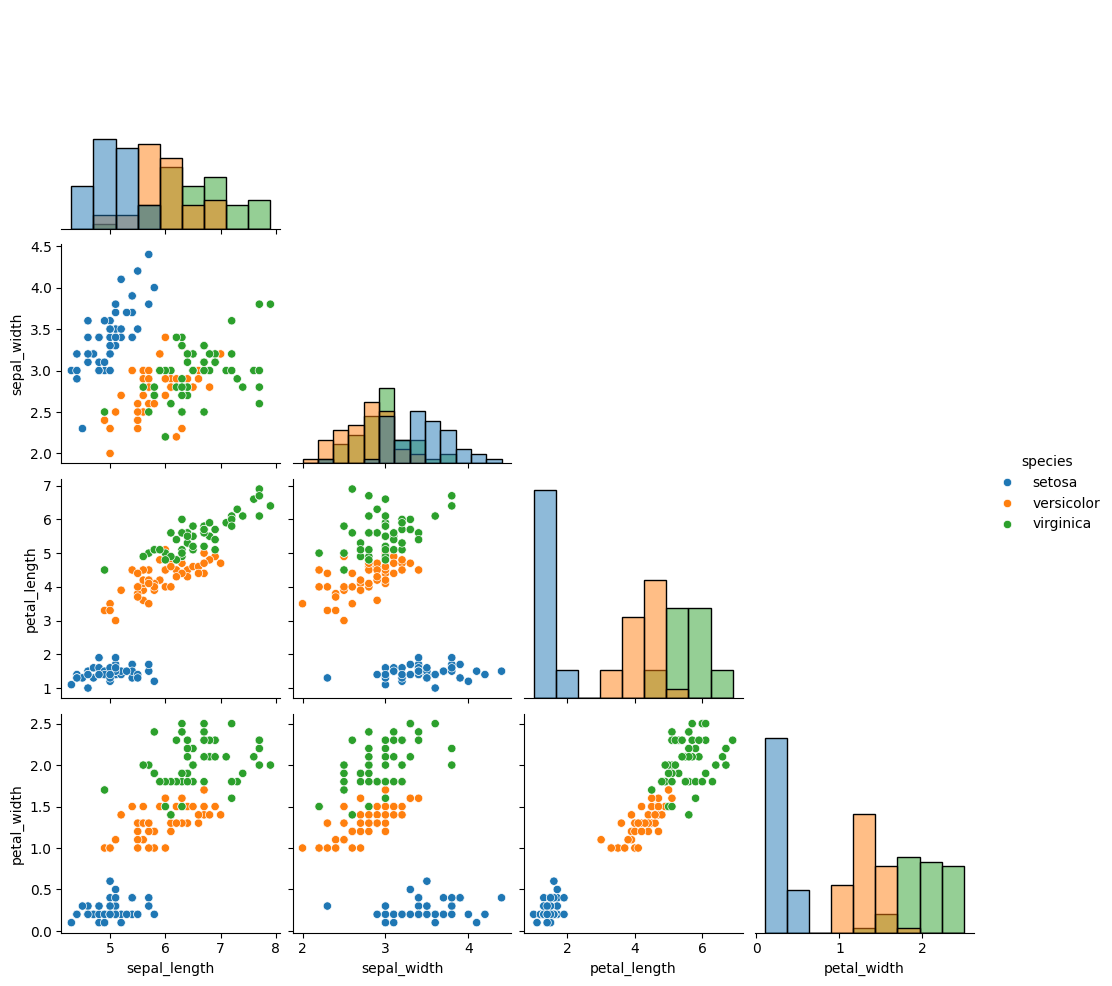

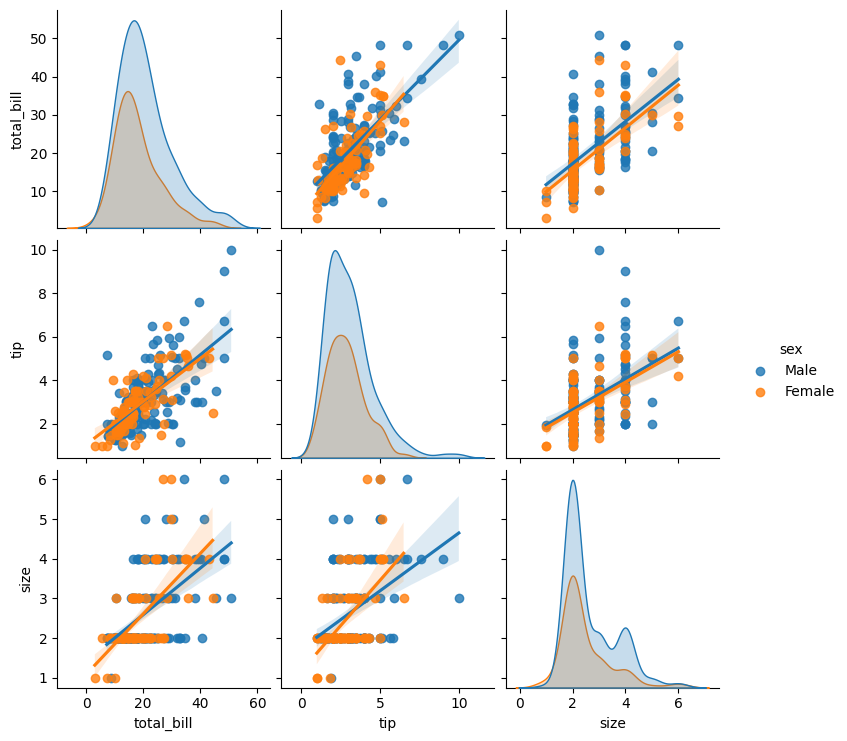

In [10]:
# PairPlot basico - Todas las variables numericas
sns.pairplot(iris)
plt.show()

# PairPlot con color por categoria (TIPICO EXAMENES)
sns.pairplot(iris, hue='species', diag_kind='kde')
plt.show()

# PairPlot con variables especificas
sns.pairplot(tips, vars=['total_bill', 'tip', 'size'], hue='time')
plt.show()

# PairPlot con histogramas en diagonal
sns.pairplot(iris, hue='species', diag_kind='hist', corner=True)
plt.show()

# PairPlot con tipo de grafico custom
sns.pairplot(tips, kind='reg', diag_kind='kde', hue='sex')
plt.show()

## 11. JointPlot - Graficos Bivariados con Distribuciones

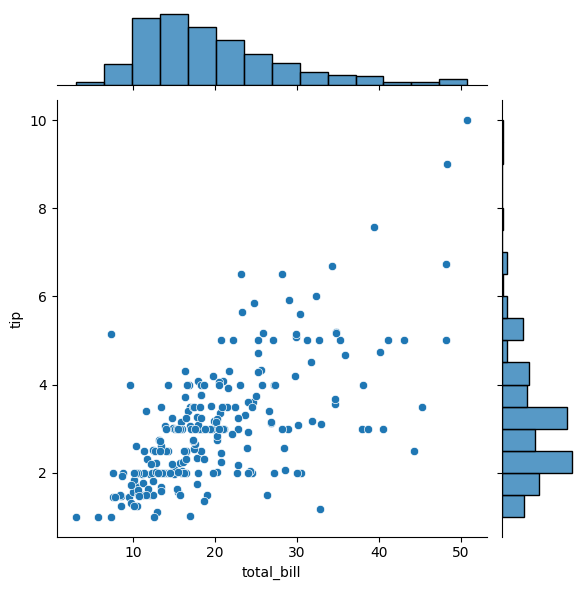

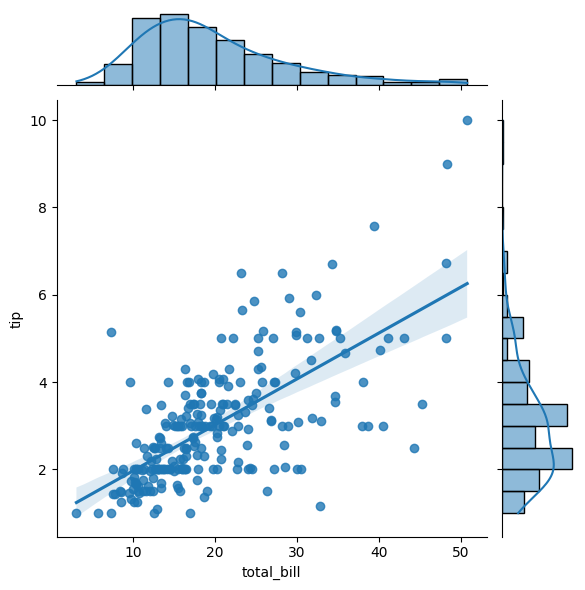

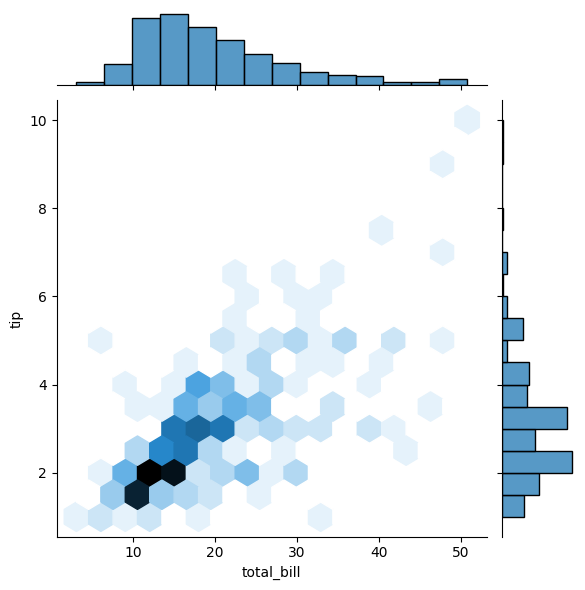

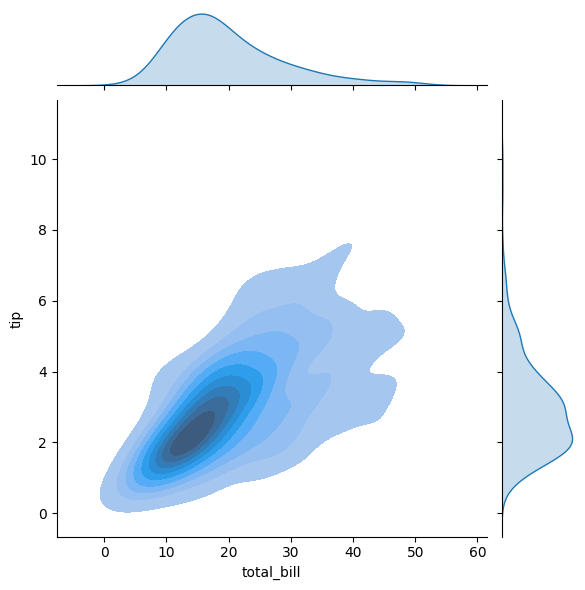

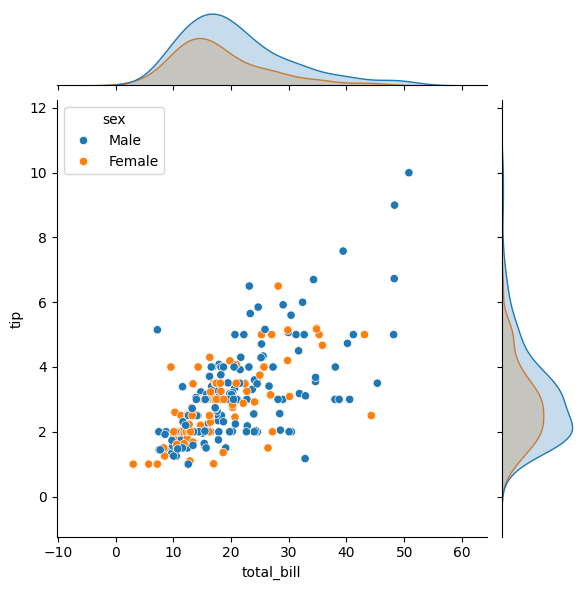

In [11]:
# JointPlot basico con scatter y histogramas
sns.jointplot(data=tips, x='total_bill', y='tip')
plt.show()

# JointPlot con regresion (TIPICO EXAMENES)
sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg')
plt.show()

# JointPlot con hexbin (para muchos datos)
sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex')
plt.show()

# JointPlot con KDE
sns.jointplot(data=tips, x='total_bill', y='tip', kind='kde', fill=True)
plt.show()

# JointPlot con hue
sns.jointplot(data=tips, x='total_bill', y='tip', hue='sex')
plt.show()

## 12. FacetGrid - Grillas de Subplots (AVANZADO)

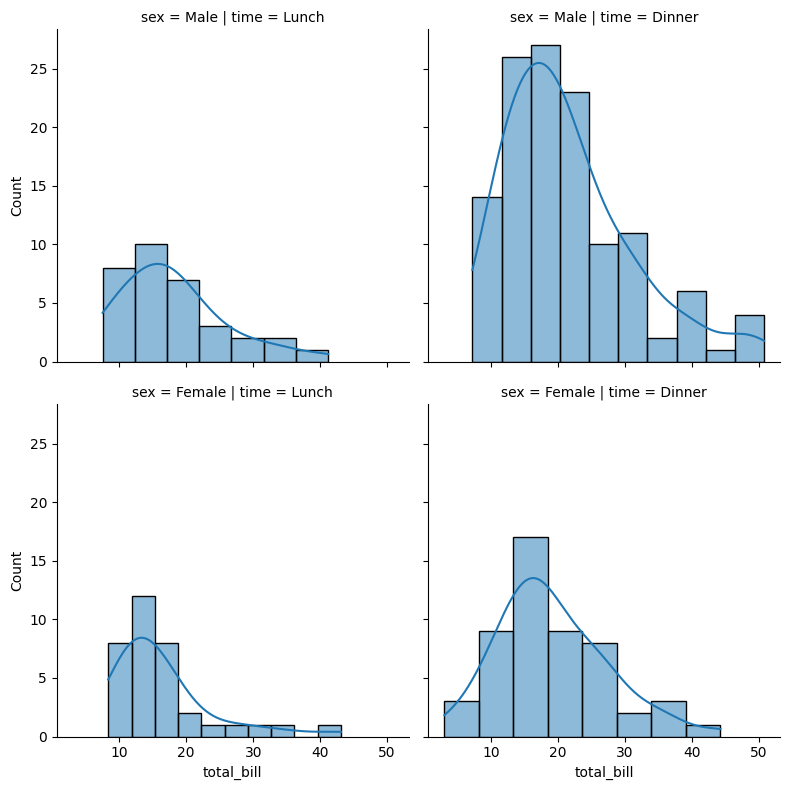

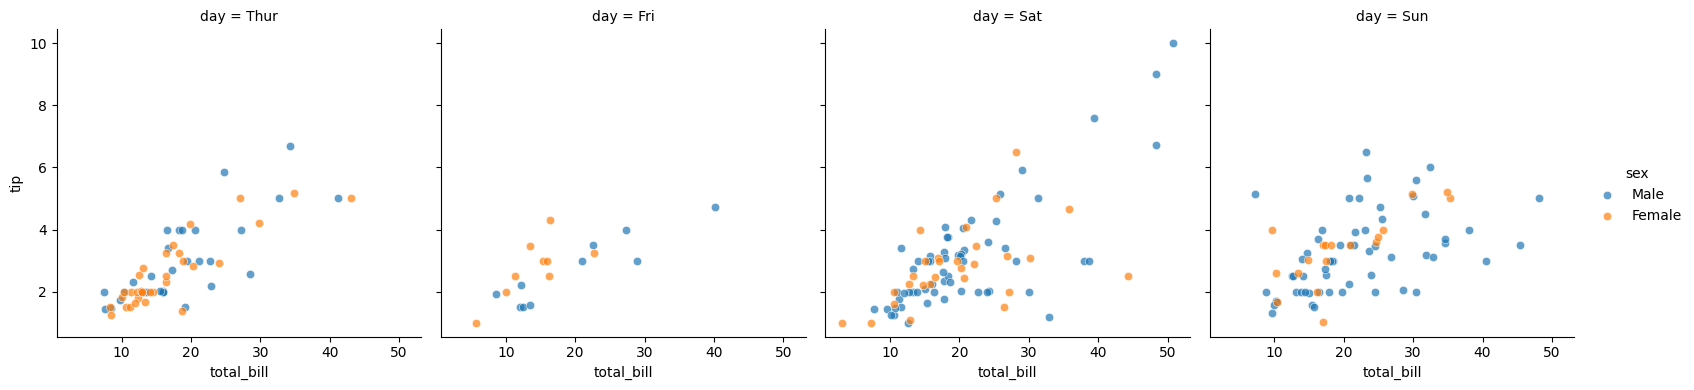

c:\Users\moise\Documents\0001_MADI\Data Science\Python_examen\.venv\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


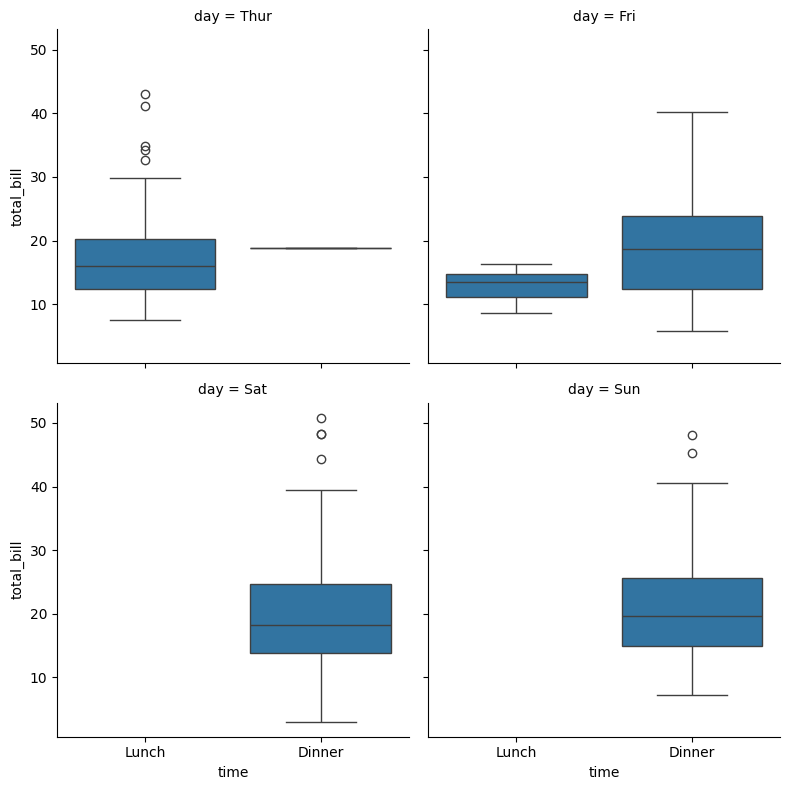

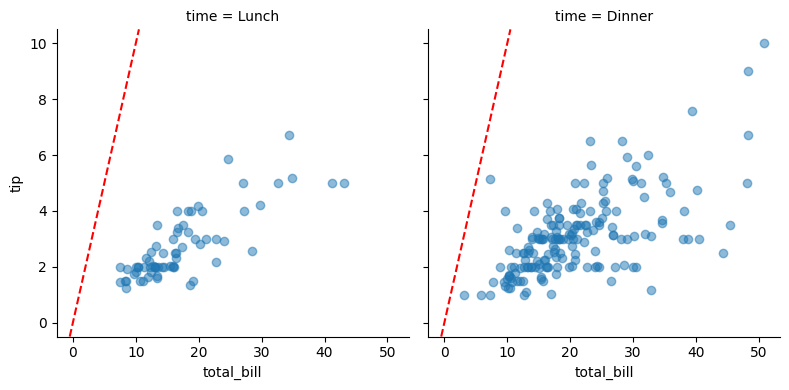

In [12]:
# FacetGrid basico con histogramas
g = sns.FacetGrid(tips, col='time', row='sex', height=4)
g.map(sns.histplot, 'total_bill', kde=True)
plt.show()

# FacetGrid con scatterplot
g = sns.FacetGrid(tips, col='day', hue='sex', height=4)
g.map(sns.scatterplot, 'total_bill', 'tip', alpha=0.7)
g.add_legend()
plt.show()

# FacetGrid con boxplot
g = sns.FacetGrid(tips, col='day', col_wrap=2, height=4)
g.map(sns.boxplot, 'time', 'total_bill')
plt.show()

# FacetGrid con funcion custom
def custom_plot(x, y, **kwargs):
    plt.scatter(x, y, **kwargs)
    plt.axline([0, 0], [1, 1], color='red', linestyle='--')

g = sns.FacetGrid(tips, col='time', height=4)
g.map(custom_plot, 'total_bill', 'tip', alpha=0.5)
plt.show()

## 13. Personalizacion de Graficos (IMPORTANTE)

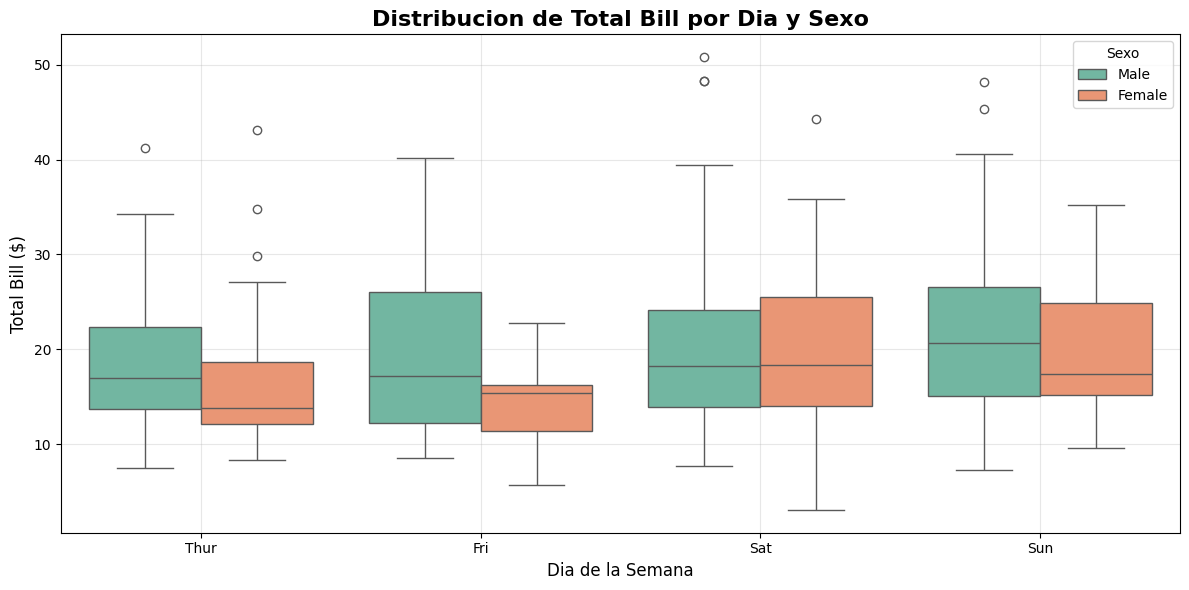

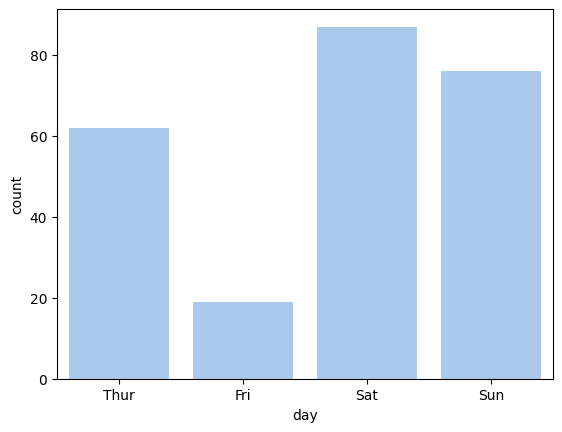

C:\Users\moise\AppData\Local\Temp\ipykernel_15556\3404561016.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tips, x='day', y='total_bill', palette=custom_colors)
C:\Users\moise\AppData\Local\Temp\ipykernel_15556\3404561016.py:25: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=tips, x='day', y='total_bill', palette=custom_colors)


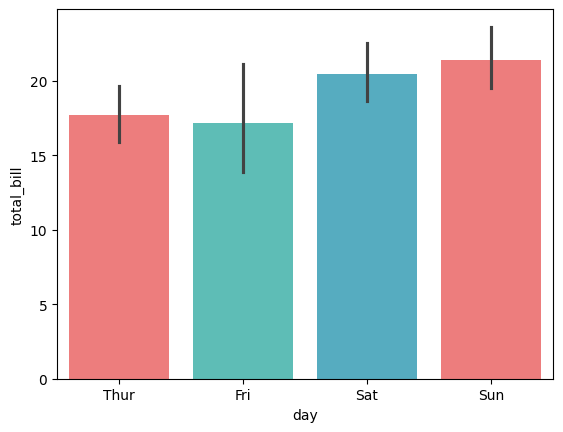

In [13]:
# Ejemplo completo de personalizacion (PATRON EXAMENES)
plt.figure(figsize=(12, 6))
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex', palette='Set2')
plt.title('Distribucion de Total Bill por Dia y Sexo', fontsize=16, fontweight='bold')
plt.xlabel('Dia de la Semana', fontsize=12)
plt.ylabel('Total Bill ($)', fontsize=12)
plt.legend(title='Sexo', loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Paletas de colores
sns.color_palette('deep')                # paletas categoricas
sns.color_palette('husl', 8)             # n colores espaciados
sns.color_palette('Blues')               # secuencial
sns.color_palette('RdBu_r', 7)           # divergente

# Aplicar paleta a un grafico
sns.set_palette('pastel')
sns.countplot(data=tips, x='day')
plt.show()

# Colores custom
custom_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
sns.barplot(data=tips, x='day', y='total_bill', palette=custom_colors)
plt.show()

## 14. Estilos y Contextos (CONFIGURACION)

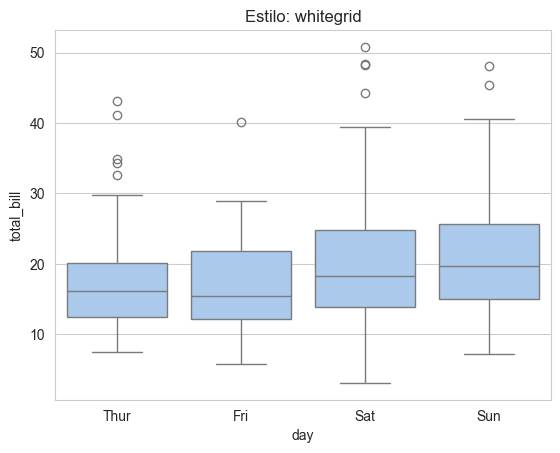

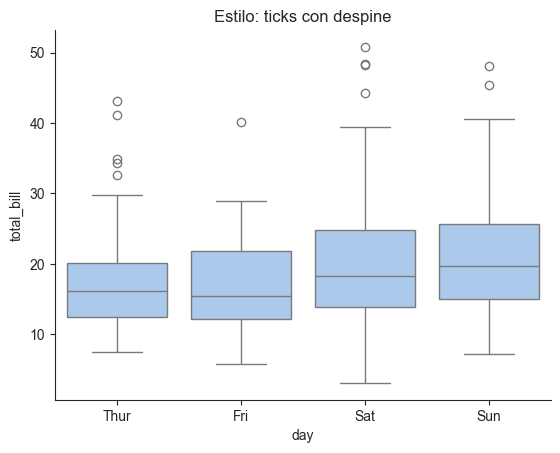

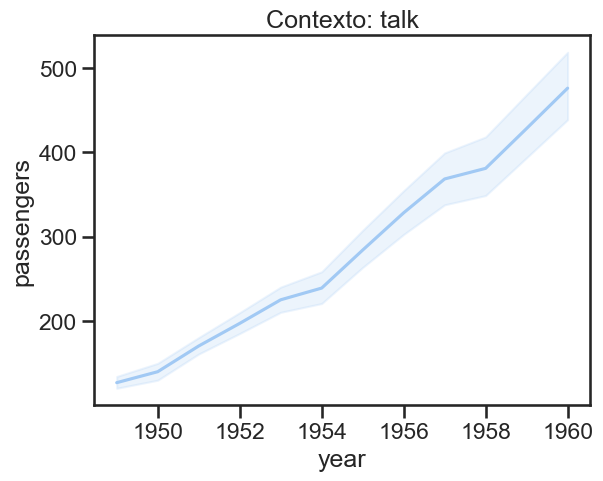

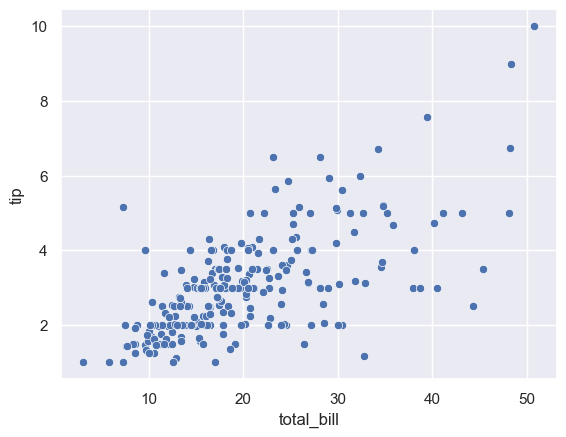

In [14]:
# Estilos disponibles
# 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'

# Ejemplo con diferentes estilos
sns.set_style('whitegrid')
sns.boxplot(data=tips, x='day', y='total_bill')
plt.title('Estilo: whitegrid')
plt.show()

sns.set_style('ticks')
sns.boxplot(data=tips, x='day', y='total_bill')
sns.despine()  # Quitar bordes superior y derecho
plt.title('Estilo: ticks con despine')
plt.show()

# Contextos (escala de elementos)
# 'paper', 'notebook', 'talk', 'poster'
sns.set_context('talk')  # Mas grande para presentaciones
sns.lineplot(data=flights, x='year', y='passengers')
plt.title('Contexto: talk')
plt.show()

# Combinar estilo y contexto
sns.set_theme(style='whitegrid', context='notebook', palette='deep')

# Usar estilo temporalmente
with sns.axes_style('darkgrid'):
    sns.scatterplot(data=tips, x='total_bill', y='tip')
    plt.show()

## 15. Guardar Graficos (IMPORTANTE)

TypeError: FigureCanvasAgg.print_jpg() got an unexpected keyword argument 'quality'

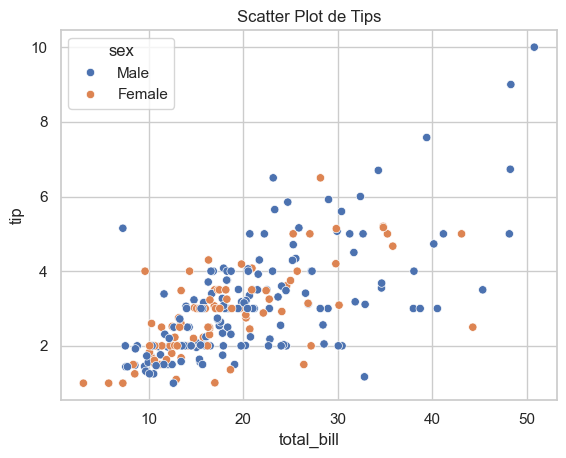

In [15]:
# Crear grafico
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex')
plt.title('Scatter Plot de Tips')

# Guardar con diferentes formatos
plt.savefig('scatter_tips.png', dpi=300, bbox_inches='tight')  # PNG alta calidad
plt.savefig('scatter_tips.pdf', bbox_inches='tight')           # PDF vectorial
plt.savefig('scatter_tips.jpg', dpi=150, quality=95)           # JPG
plt.savefig('scatter_tips.svg', bbox_inches='tight')           # SVG vectorial

plt.show()
plt.close()  # Cerrar figura para liberar memoria

# Guardar con tamaño especifico
plt.figure(figsize=(10, 6))
sns.boxplot(data=tips, x='day', y='total_bill')
plt.savefig('boxplot_tips.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.close()

## 16. Subplots con Seaborn (PATRON EXAMENES)

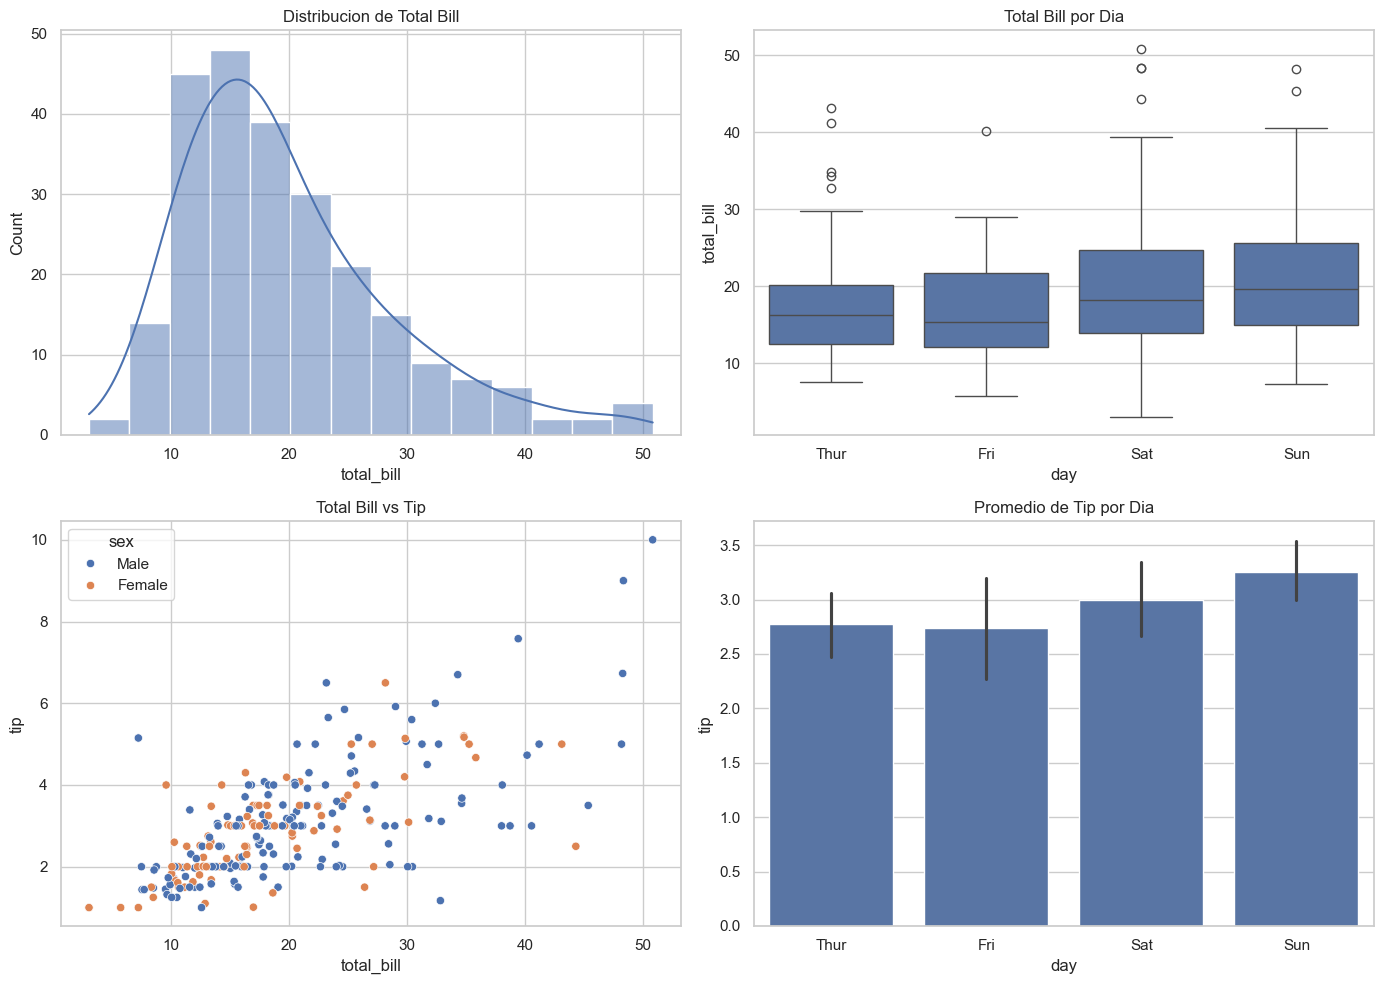

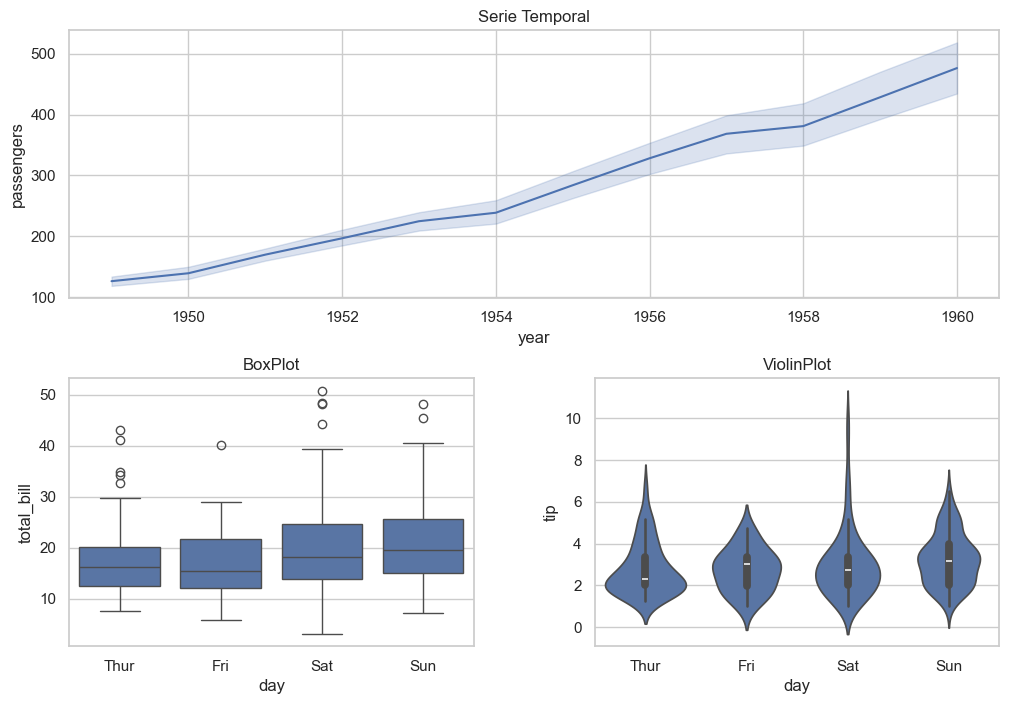

In [16]:
# Crear subplots con matplotlib + seaborn
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Subplot 1: Histogram
sns.histplot(data=tips, x='total_bill', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribucion de Total Bill')

# Subplot 2: Boxplot
sns.boxplot(data=tips, x='day', y='total_bill', ax=axes[0, 1])
axes[0, 1].set_title('Total Bill por Dia')

# Subplot 3: Scatter
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', ax=axes[1, 0])
axes[1, 0].set_title('Total Bill vs Tip')

# Subplot 4: Bar
sns.barplot(data=tips, x='day', y='tip', ax=axes[1, 1])
axes[1, 1].set_title('Promedio de Tip por Dia')

plt.tight_layout()
plt.show()

# Subplots con diferentes tamaños
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

ax1 = fig.add_subplot(gs[0, :])
sns.lineplot(data=flights, x='year', y='passengers', ax=ax1)
ax1.set_title('Serie Temporal')

ax2 = fig.add_subplot(gs[1, 0])
sns.boxplot(data=tips, x='day', y='total_bill', ax=ax2)
ax2.set_title('BoxPlot')

ax3 = fig.add_subplot(gs[1, 1])
sns.violinplot(data=tips, x='day', y='tip', ax=ax3)
ax3.set_title('ViolinPlot')

plt.show()

## 17. Estadisticas Avanzadas - Agregaciones con Graficos

C:\Users\moise\AppData\Local\Temp\ipykernel_15556\900339205.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=tips, x='day', y='total_bill', estimator=np.mean, ci=95)


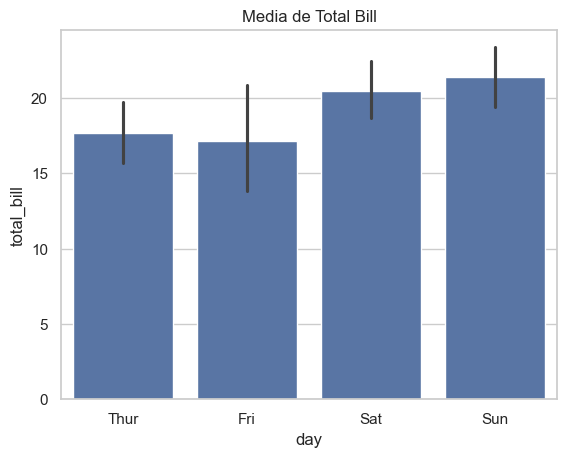

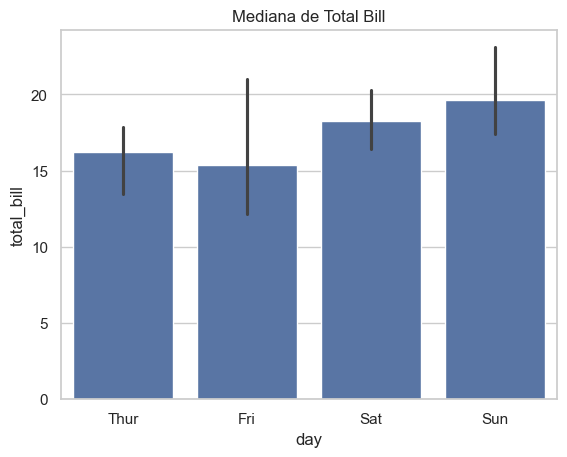

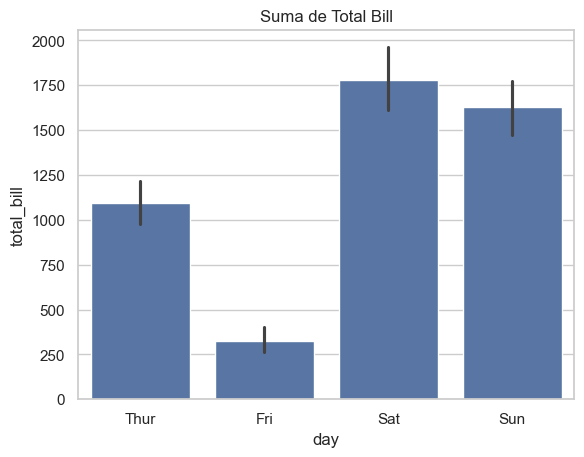

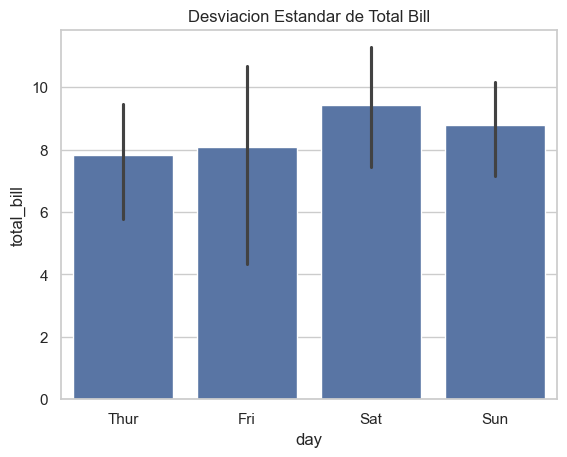

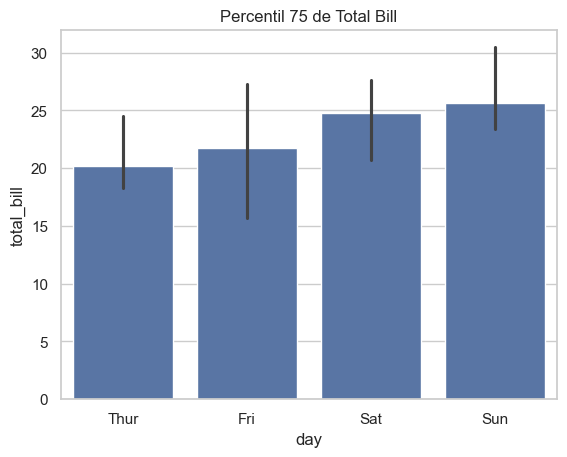

In [17]:
# Barplot con diferentes estimadores
import numpy as np

# Media (default)
sns.barplot(data=tips, x='day', y='total_bill', estimator=np.mean, ci=95)
plt.title('Media de Total Bill')
plt.show()

# Mediana
sns.barplot(data=tips, x='day', y='total_bill', estimator=np.median)
plt.title('Mediana de Total Bill')
plt.show()

# Suma
sns.barplot(data=tips, x='day', y='total_bill', estimator=np.sum)
plt.title('Suma de Total Bill')
plt.show()

# Desviacion estandar
sns.barplot(data=tips, x='day', y='total_bill', estimator=np.std)
plt.title('Desviacion Estandar de Total Bill')
plt.show()

# Funcion custom
def percentil_75(x):
    return np.percentile(x, 75)

sns.barplot(data=tips, x='day', y='total_bill', estimator=percentil_75)
plt.title('Percentil 75 de Total Bill')
plt.show()

## 18. Trabajar con DataFrames Agregados (PATRON EXAMENES)

C:\Users\moise\AppData\Local\Temp\ipykernel_15556\203885419.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_agg = tips.groupby(['day', 'sex'])['total_bill'].mean().reset_index()


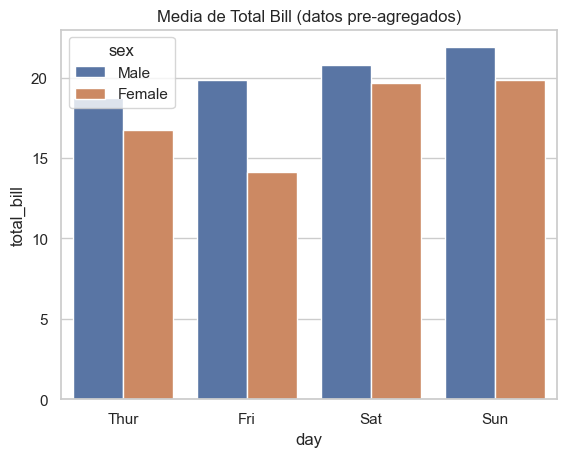

C:\Users\moise\AppData\Local\Temp\ipykernel_15556\203885419.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips_pivot = tips.pivot_table(values='total_bill', index='day',


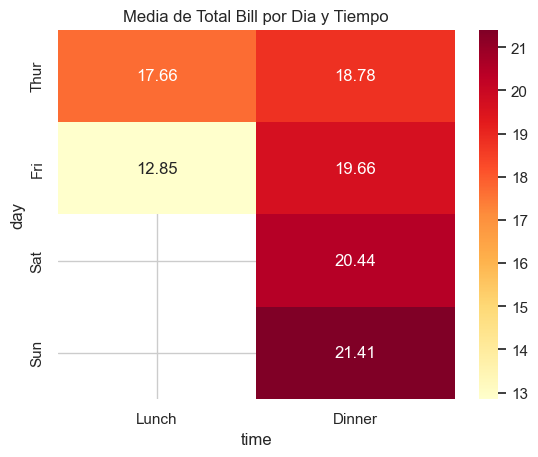

C:\Users\moise\AppData\Local\Temp\ipykernel_15556\203885419.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_multi = tips.groupby('day').agg({


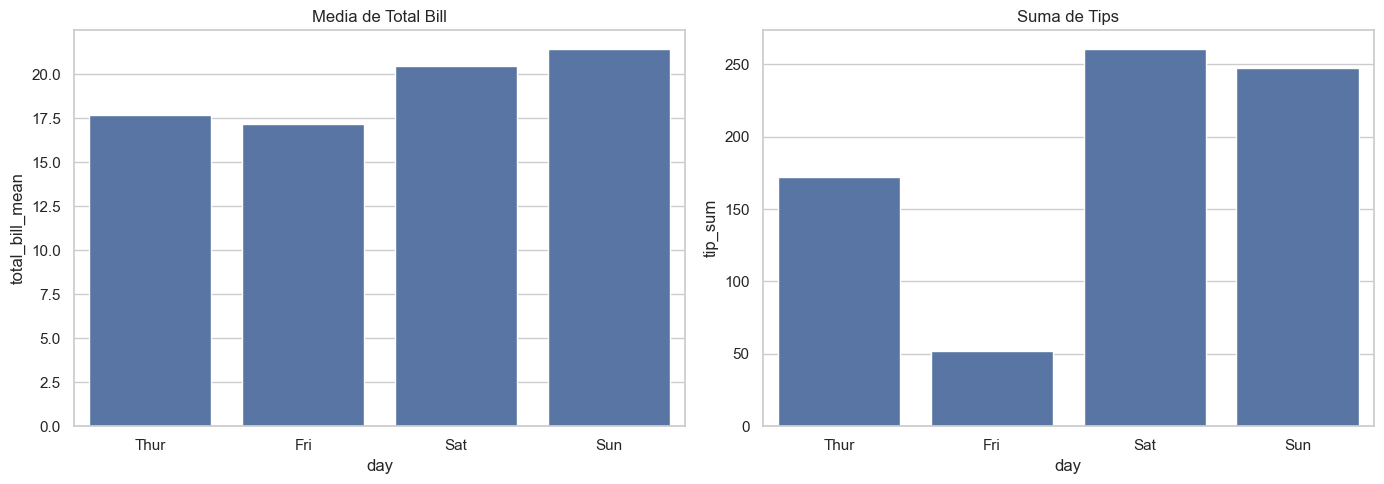

In [18]:
# Preparar datos agregados con pandas
tips_agg = tips.groupby(['day', 'sex'])['total_bill'].mean().reset_index()

# Graficar datos ya agregados
sns.barplot(data=tips_agg, x='day', y='total_bill', hue='sex')
plt.title('Media de Total Bill (datos pre-agregados)')
plt.show()

# Pivot para heatmap
tips_pivot = tips.pivot_table(values='total_bill', index='day', 
                               columns='time', aggfunc='mean')
sns.heatmap(tips_pivot, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Media de Total Bill por Dia y Tiempo')
plt.show()

# Multiples agregaciones
tips_multi = tips.groupby('day').agg({
    'total_bill': ['mean', 'median', 'std'],
    'tip': ['mean', 'sum']
}).reset_index()
tips_multi.columns = ['_'.join(col).strip('_') for col in tips_multi.columns.values]

# Graficar multiples metricas
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(data=tips_multi, x='day', y='total_bill_mean', ax=axes[0])
axes[0].set_title('Media de Total Bill')
sns.barplot(data=tips_multi, x='day', y='tip_sum', ax=axes[1])
axes[1].set_title('Suma de Tips')
plt.tight_layout()
plt.show()

## 19. Graficos de Series Temporales

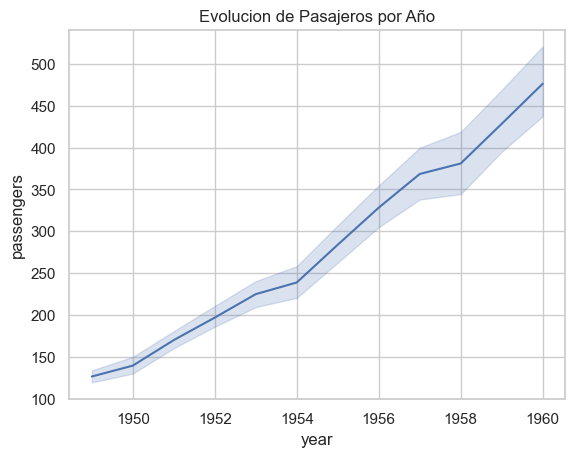

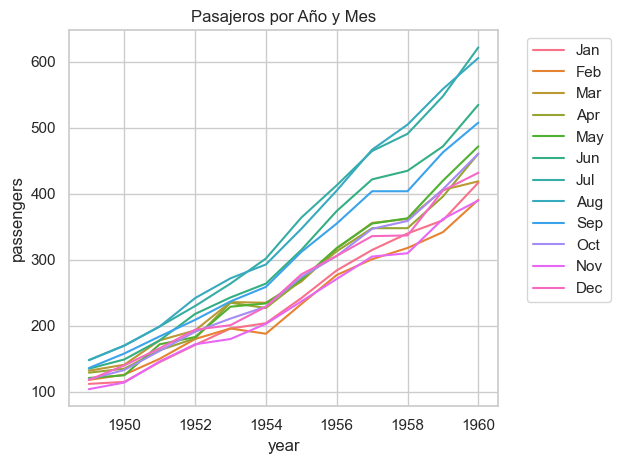

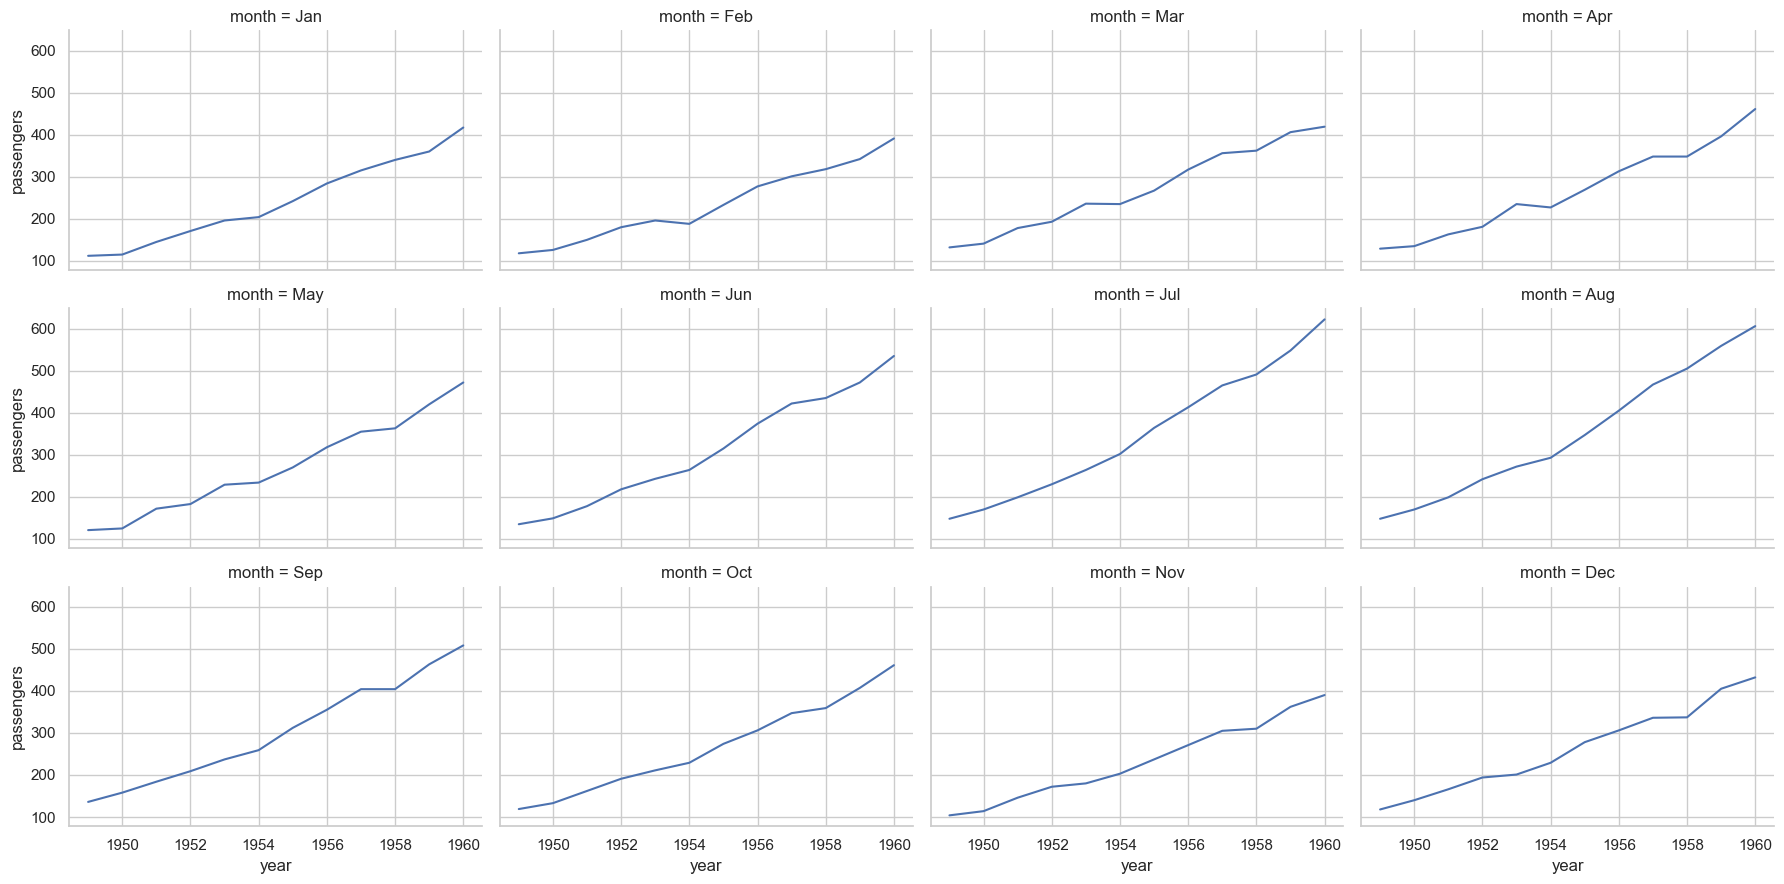

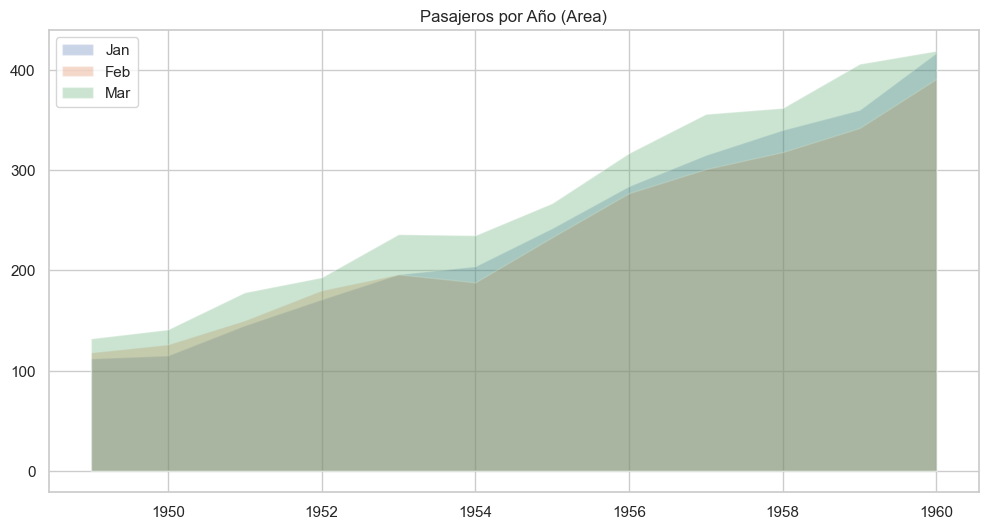

In [19]:
# Lineplot para series temporales
sns.lineplot(data=flights, x='year', y='passengers')
plt.title('Evolucion de Pasajeros por Año')
plt.show()

# Multiples series
sns.lineplot(data=flights, x='year', y='passengers', hue='month')
plt.title('Pasajeros por Año y Mes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Relplot con facets para series temporales
sns.relplot(data=flights, x='year', y='passengers', col='month', 
            col_wrap=4, kind='line', height=3, aspect=1.5)
plt.show()

# Grafico de area (usar matplotlib + seaborn)
plt.figure(figsize=(12, 6))
for month in flights['month'].unique()[:3]:  # Solo 3 meses para ejemplo
    data = flights[flights['month'] == month]
    plt.fill_between(data['year'], data['passengers'], alpha=0.3, label=month)
plt.title('Pasajeros por Año (Area)')
plt.legend()
plt.show()

## 20. Tips y Trucos Finales (EXAMENES)

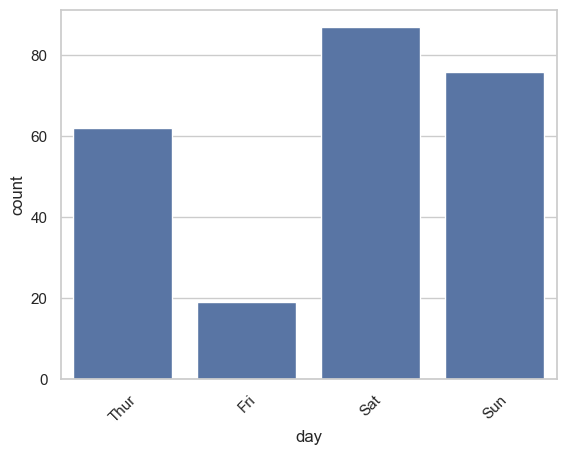

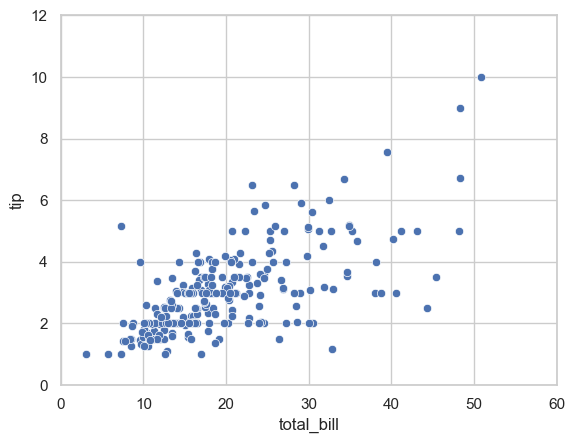

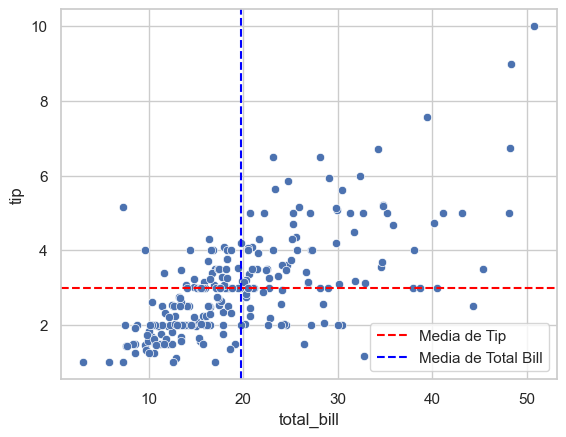

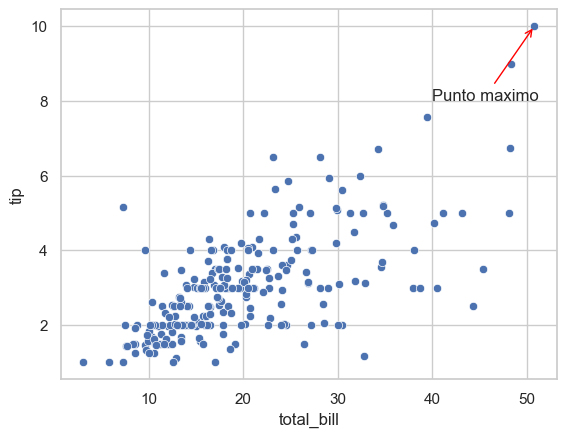

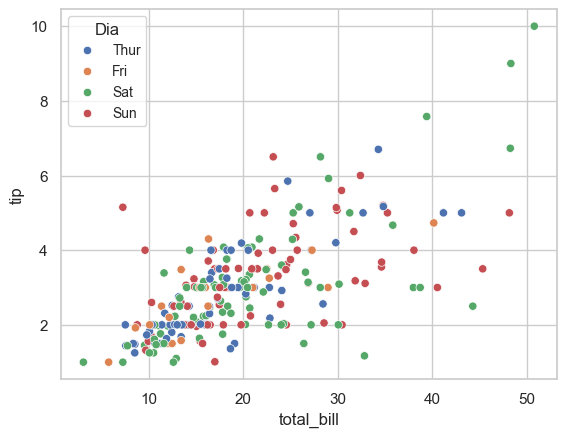

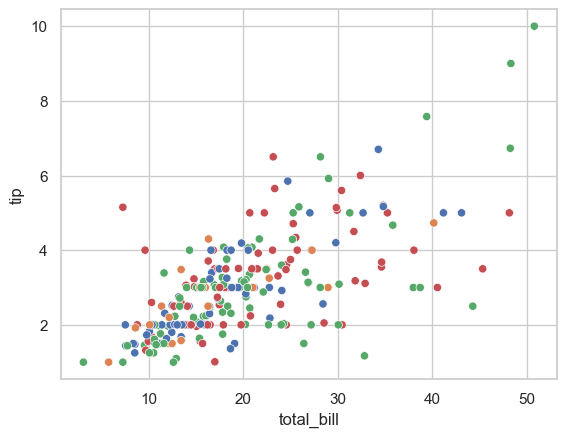

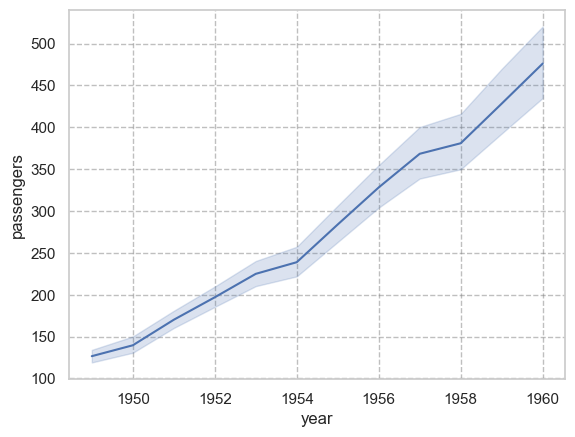

In [20]:
# Rotacion de etiquetas en eje x
sns.countplot(data=tips, x='day')
plt.xticks(rotation=45)
plt.show()

# Limites de ejes
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.xlim(0, 60)
plt.ylim(0, 12)
plt.show()

# Lineas de referencia
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.axhline(y=tips['tip'].mean(), color='red', linestyle='--', label='Media de Tip')
plt.axvline(x=tips['total_bill'].mean(), color='blue', linestyle='--', label='Media de Total Bill')
plt.legend()
plt.show()

# Anotaciones
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.annotate('Punto maximo', xy=(tips['total_bill'].max(), tips['tip'].max()),
             xytext=(40, 8), arrowprops=dict(arrowstyle='->', color='red'))
plt.show()

# Cambiar tamaño de leyenda
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day')
plt.legend(title='Dia', fontsize=10, title_fontsize=12, loc='upper left')
plt.show()

# Grafico sin leyenda
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day', legend=False)
plt.show()

# Grid personalizado
sns.lineplot(data=flights, x='year', y='passengers')
plt.grid(True, linestyle='--', alpha=0.5, color='gray')
plt.show()

## 21. Workflow Completo - Analisis Exploratorio (PATRON EXAMENES)

(244, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


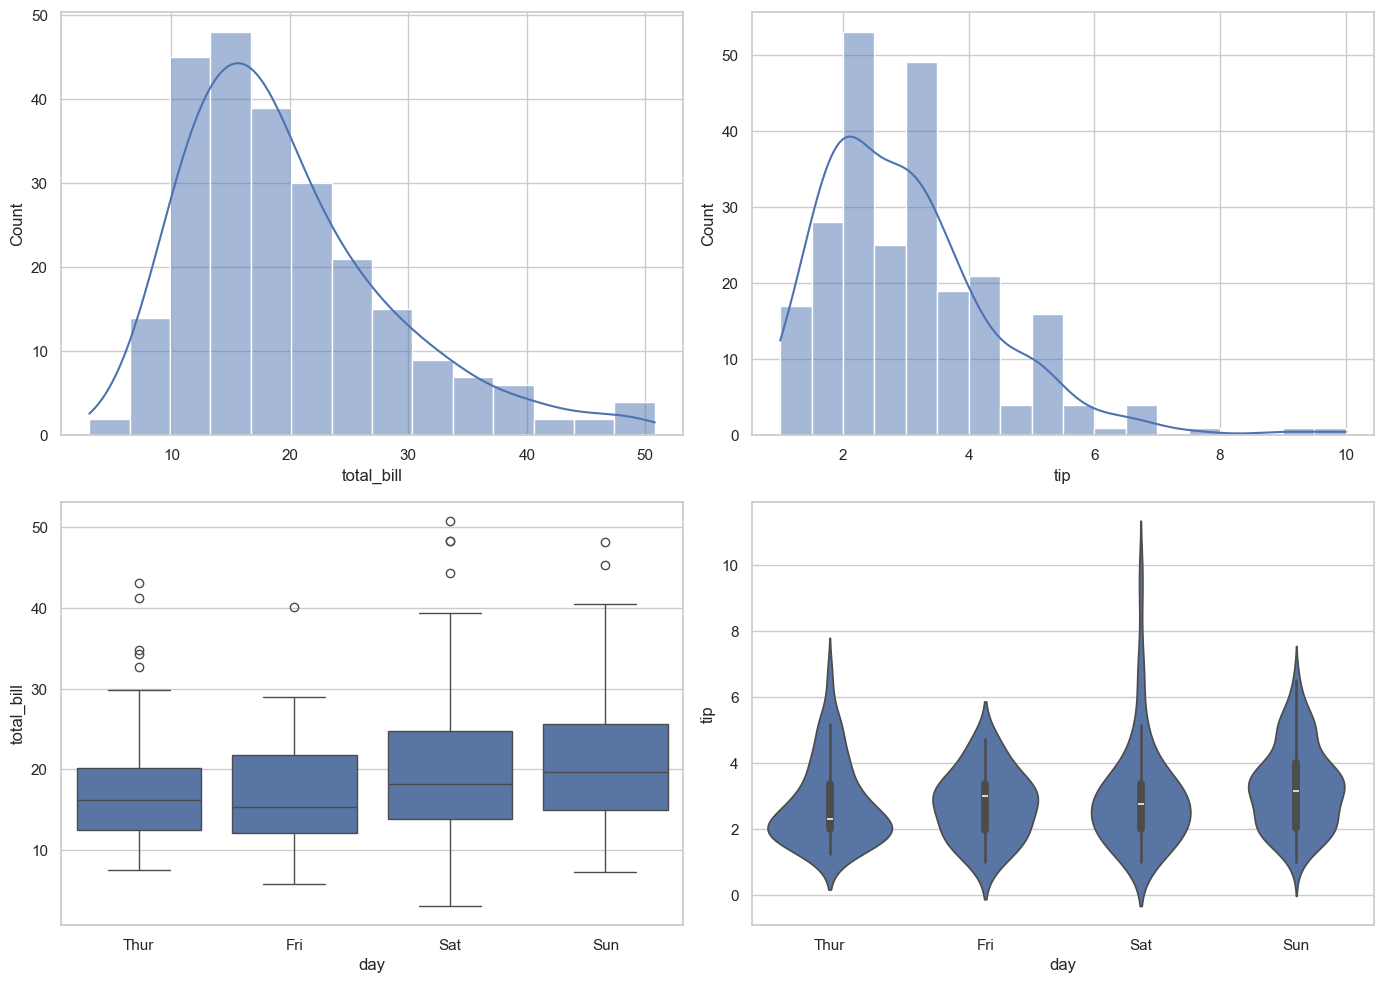

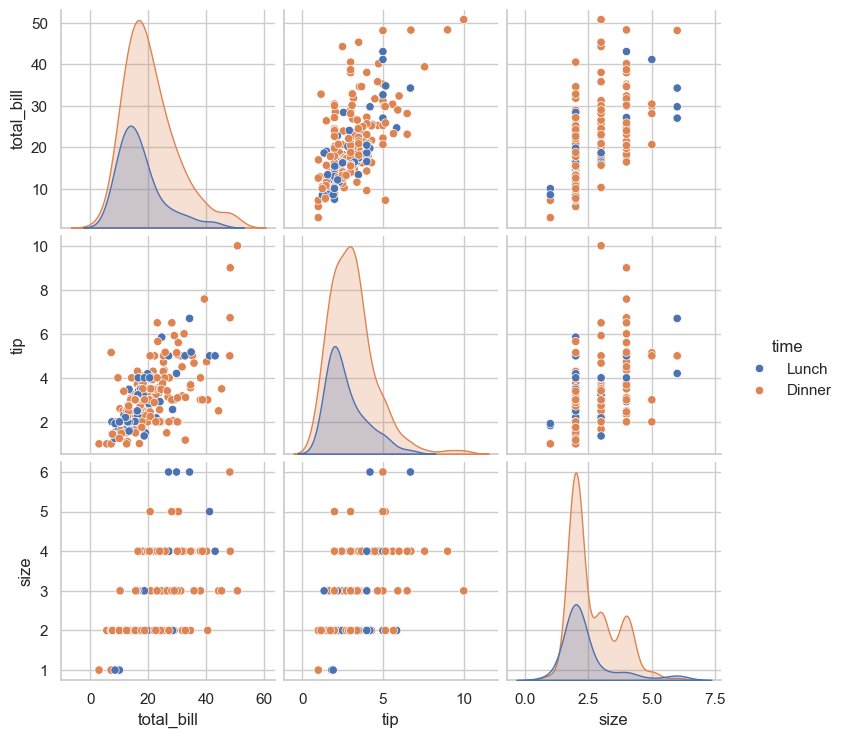

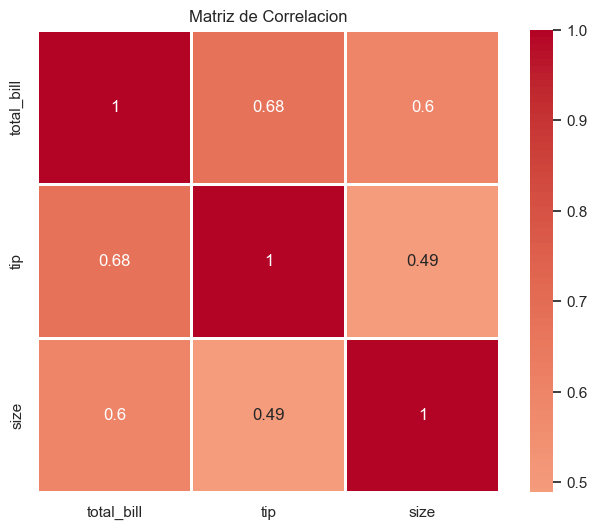

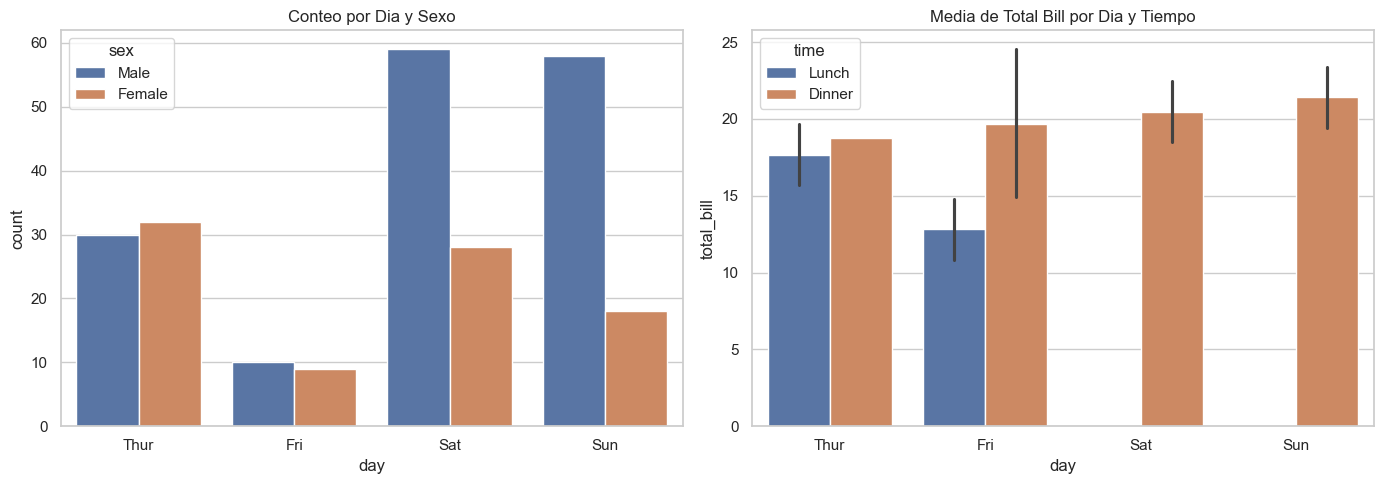

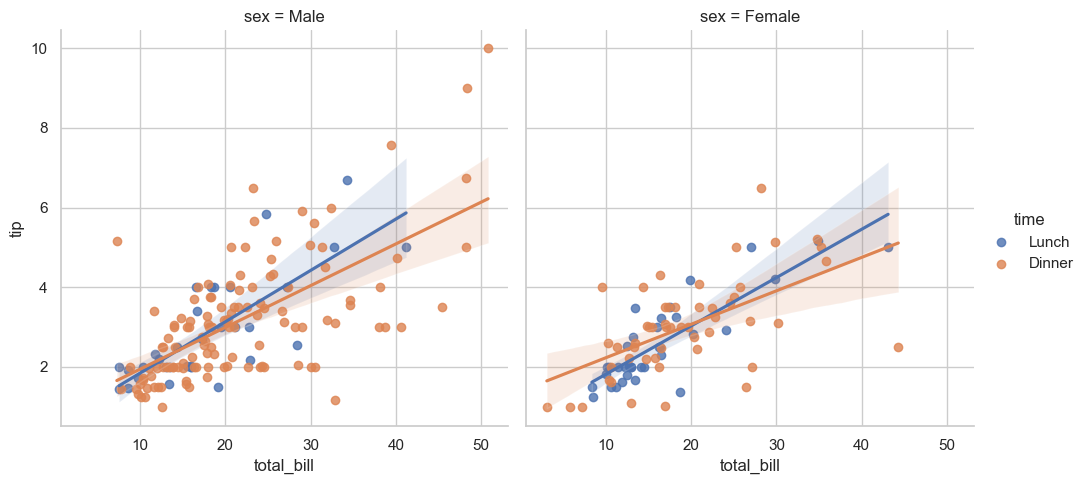

Analisis exploratorio completo!


In [21]:
# 1. Cargar y explorar datos
df = sns.load_dataset('tips')
print(df.shape)
print(df.info())
print(df.describe())

# 2. Configurar estilo
sns.set_theme(style='whitegrid', context='notebook', palette='deep')

# 3. Distribucion de variables numericas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(data=df, x='total_bill', kde=True, ax=axes[0, 0])
sns.histplot(data=df, x='tip', kde=True, ax=axes[0, 1])
sns.boxplot(data=df, x='day', y='total_bill', ax=axes[1, 0])
sns.violinplot(data=df, x='day', y='tip', ax=axes[1, 1])
plt.tight_layout()
plt.show()

# 4. Analisis de relaciones
sns.pairplot(df, hue='time', diag_kind='kde')
plt.show()

# 5. Matriz de correlacion
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1)
plt.title('Matriz de Correlacion')
plt.show()

# 6. Analisis categorico
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(data=df, x='day', hue='sex', ax=axes[0])
axes[0].set_title('Conteo por Dia y Sexo')
sns.barplot(data=df, x='day', y='total_bill', hue='time', ax=axes[1])
axes[1].set_title('Media de Total Bill por Dia y Tiempo')
plt.tight_layout()
plt.show()

# 7. Analisis de regresion
sns.lmplot(data=df, x='total_bill', y='tip', hue='time', col='sex', height=5)
plt.show()

print('Analisis exploratorio completo!')